<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 8 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 28 October 2019, with material from Carl Rasmussen and John P. Cunningham</div>

# Statistics + Linear Algebra = Gaussian Processes (GP)

Gaussian Processes is a mix of Bayesian Analysis and Linear Algebra, so it's our ***3rd application of our Linear Algebra***, after **graphs** and **games**. We also learn a bit about [Fintech](https://en.wikipedia.org/wiki/Financial_technology), and a number of other things relevant to Data Science, today. Your ability to model datasets is going to increase exponentially!

A machine-learning algorithm that involves a Gaussian process uses lazy learning and a measure of the similarity between points (the kernel function) to predict the value for an unseen point from training data. The prediction is not just an estimate for that point, but also has uncertainty information: It is a one-dimensional Gaussian distribution.

This technique is a form of interpolation called [kriging](https://en.wikipedia.org/wiki/Kriging) and yields the ***best linear unbiased prediction of intermediate (unobserved) values***. Interpolating methods based on other criteria such as smoothness (e.g., smoothing spline) need not yield the most likely intermediate values. The method is widely used in the domain of spatial analysis and computer experiments. The technique is also known as **Wiener–Kolmogorov** (WK) prediction, after [Norbert Wiener](https://en.wikipedia.org/wiki/Norbert_Wiener) and [Andrey Kolmogorov](https://en.wikipedia.org/wiki/Andrey_Kolmogorov).

The bible on GPs is [Rasmussen & Williams, Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/).

The whole point of your bayesian athletic analysis HW (and why I gave you an extra week) is to find correlation between data columns and then build a related model. Absent correlations, you cannot model the data using histograms and Bayesian analysis, and ML algorithms will yield **junk** that just learns data by heart and is ***no good*** at predicting datapoints that are not part of the training set.

So the whole point is to do ***very good Exploratory Data Analysis*** (EDA). The modern data scientist's method follows the **scientific method**. The syntax and the adjectives of this method are often statistical.

Statisticians use **linear regression** as the primary prediction tool, and the study of the **correlation coefficient** is the primary means of evaluating the significance and potential usefulness of predictions. The most important tool for correlation is the **Pearson correlation coefficient**. But in this notebook, we'll uncover a *better one*, which reveals **non-linear** dependences!

## 1. Variance and standard deviation

I love dogs. Here are some of  my favorite species, with heights in millimetres:

<br />
<center>
<img src="images/dogs.jpg" width=400 />
</center>

Heights (at the shoulders) are: 600mm, 470mm, 170mm, 430mm and 300mm.

- Compute the mean:

In [5]:
import numpy as np
dogs = np.array([600,470,170,430,300])

In [6]:
mean = dogs.mean()
mean

394.0

The mean (average) height is 394 mm. Let's plot this on the chart:

<br />
<center>
<img src="images/dogs-mean.jpg" width=400 />
</center>

- Now, calculate each dogs difference from the mean:

<br />
<center>
<img src="images/dogs-variance.jpg" width=400 />
</center>

- To calculate the Variance, take each difference, square it, and then average the result. Do this below:

In [7]:
var = dogs.var()
var

21704.0

So, the Variance is 21,704.

And the Standard Deviation is just the square root of Variance, so:

In [8]:
std = dogs.std()
std

147.32277488562318

And the good thing about the Standard Deviation is that it is **useful**. Now we can show which heights are within one Standard Deviation (147mm) of the Mean:

<br />
<center>
<img src="images/dogs-standard-deviation.jpg" width=400 />
</center>

So, using the Standard Deviation we have a ***standard*** way of knowing what is **normal**, and what is **extra large** or **extra small**:

The [Bernese Mountain Dog](https://www.akc.org/dog-breeds/bernese-mountain-dog/) is extra large. The [Dachshund](https://www.akc.org/dog-breeds/dachshund/) is extra small

## 2. Covariance point estimate

[Covariance](https://en.wikipedia.org/wiki/Covariance) is a measure of the joint variability of **two** random variables.

The relationship between two observed variables, $X$, and $Y$, which are almost always a sample statistic rather than a population parameter. The estimate of the sample **means** for $X$ and $Y$ is $\hat{X}$, and $\hat{Y}$ respectively, for a data set of n samples. The statistics $\sigma_x$, and $\sigma_y$ are the estimates of the **standard deviations** of the two variables, and the corresponding estimates of the variances can be denoted as $\sigma_x^2$, $\sigma_y^2$. The **Pearson correlation coefficient** is:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f76ccfa7c2ed7f5b085115086107bbe25d329cec)

> $$r = \frac{\sum_i^N (X_i - \hat{X}) \; (Y_i - \hat{Y})}{\sum_i^N (X_i - \hat{X})^2 \; \sum_i^N(Y_i - \hat{Y})^2}$$
> Dino's fomula, seems like something wrong

If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive.

In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative.

The covariance of two variables is highest when they ***vary together***: a high value of $X$ yields a low value of $Y$, or the opposite. When the variables change in a connected fashion, they co-vary, and thus their covariance is high.

The sign of the covariance therefore shows the tendency in the linear relationship between the variables. 

The **normalized version** of the covariance, the [correlation coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient), however, shows by its magnitude the strength of the linear relation.

In [14]:
from numpy import array
from numpy import cov
from numpy import std

x = array([1,2,3,4,5,6,7,8,9])
print(x)

y = array([9,8,7,6,5,4,3,2,1])
print(y)

Sigma = cov(x,y)[0,1]
print(Sigma)

[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]
-7.5


The magnitude of the covariance is not easy to interpret because it is *not normalized* and hence ***depends on the magnitudes of the variables, and on their units of dimension***. 

The covariance can be normalized to a score between -1 and 1 to make the magnitude interpretable by dividing it by the standard deviation of X and Y. The result is called the **correlation** of the variables, also called the **Pearson correlation coefficient**, named for the developer of the method.

In [15]:
r = cov(x, y)[0,1] / (std(x) * std(y))
r

-1.125

In [16]:
from numpy import corrcoef
Sigma = corrcoef(x,y)[0,1]
print(Sigma)

-1.0


We can see that the vectors are maximally negatively correlated as we designed.

Statisticians have **frequentist** tests to see if different samples belong to the same population, if they have the same means, variances, etc. These tests have many names, such as Chi squared-tests, T-tests, F-tests, etc. The tests all focus on probabilities, and are typically concerned with sample size. Central to the testing is the uncertainty of whether two samples or variables are really related and how.

The tests often make use of the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), which generally allows for the use of the normal distribution for a large number of samples, even for non-normally distributed variables.

Significance testing of correlation coefficients was introduced by Fisher (1935). His approach was to test the null hypothesis that the correlation coefficient could have been found by random chance.

## 3. Feature selection and Covariance Matrix

The [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) is a square and symmetric matrix that describes the covariance between two or more random variables.

A covariance matrix is a generalization of the covariance of two variables and captures the way in which all variables in the dataset may change together.

The diagonal of the covariance matrix are the variances of each of the random variables. The non-diagonal term $(i,j)$ is the covariance between the $i$th random variable, and the $j$th random variable.

The covariance matrix is denoted by the uppercase Greek letter $\Sigma$.

The covariance matrix provides a useful tool for separating the structured relationships in a matrix of random variables. This can be used to decorrelate variables or applied as a transform to other variables. It is a key element used in the [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) data reduction method.

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
#pyplot.style.use('ggplot')
import pandas as pd
import seaborn as sns

We take data from [here](https://csegrecorder.com/columns/view/value-of-integrated-geophysics-201312). The data was defined (or created) with the following relationship:

$$Y = 1.5 * \text{Gross_pay} + 0.1 * \text{Phi_h}\; - 6 * \text{Position} + 1.5 * \text{Pressure}$$

The authors then add a bit of noise, and attempt a linear regression using all predictor variables.

In [2]:
data = pd.read_csv("data/Table2.csv")
data

,Gross_pay,Phi_h,Position,Pressure,Random_1,Random_2,Gross_pay_transform,Production
0,0.1,0.5,2.1,19,5,379,3.54,15.10
1,1.0,4.0,1.1,16,13,269,5.79,21.30
2,1.9,19.0,1.0,14,12,245,8.51,22.75
3,3.1,21.7,2.1,17,6,273,11.52,15.72
4,4.1,24.6,2.9,11,10,237,10.16,7.71
5,4.9,39.2,1.1,12,7,278,11.14,22.67
6,5.9,23.6,2.1,13,13,241,15.04,18.11
7,7.0,63.0,2.0,13,20,269,15.10,24.30
8,8.1,72.9,2.9,14,1,248,14.49,24.04
9,8.9,35.6,2.8,16,1,210,16.90,25.11


We do the same with Bayesian estimation, patsy-style:

In [3]:
import pymc3 as pm
with pm.Model() as glm_model:
    pm.glm.GLM.from_formula('Production ~ Gross_pay + Phi_h + Position + Pressure',
                            data,
                            family=pm.glm.families.Normal())
    trace2 = pm.sample(1000, tune=1000, init='adapt_diag')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\Users\admin\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, Pressure, Position, Phi_h, Gross_pay, Intercept]
Sampling 4 chains: 100%|██████████| 8000/8000 [03:43<00:00, 35.73draws/s]
There was 1 d

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B0A3503940>,
      dtype=object)

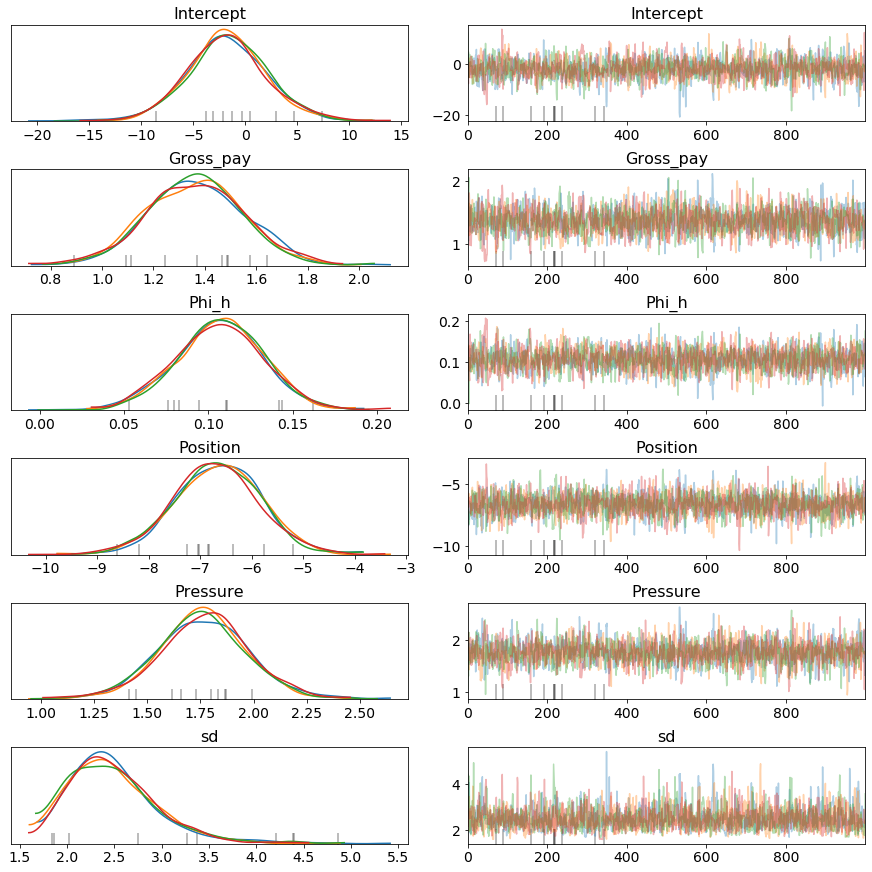

In [4]:
pm.traceplot(trace2)

D:\Users\admin\Anaconda3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B0A1D0AB70>,
      dtype=object)

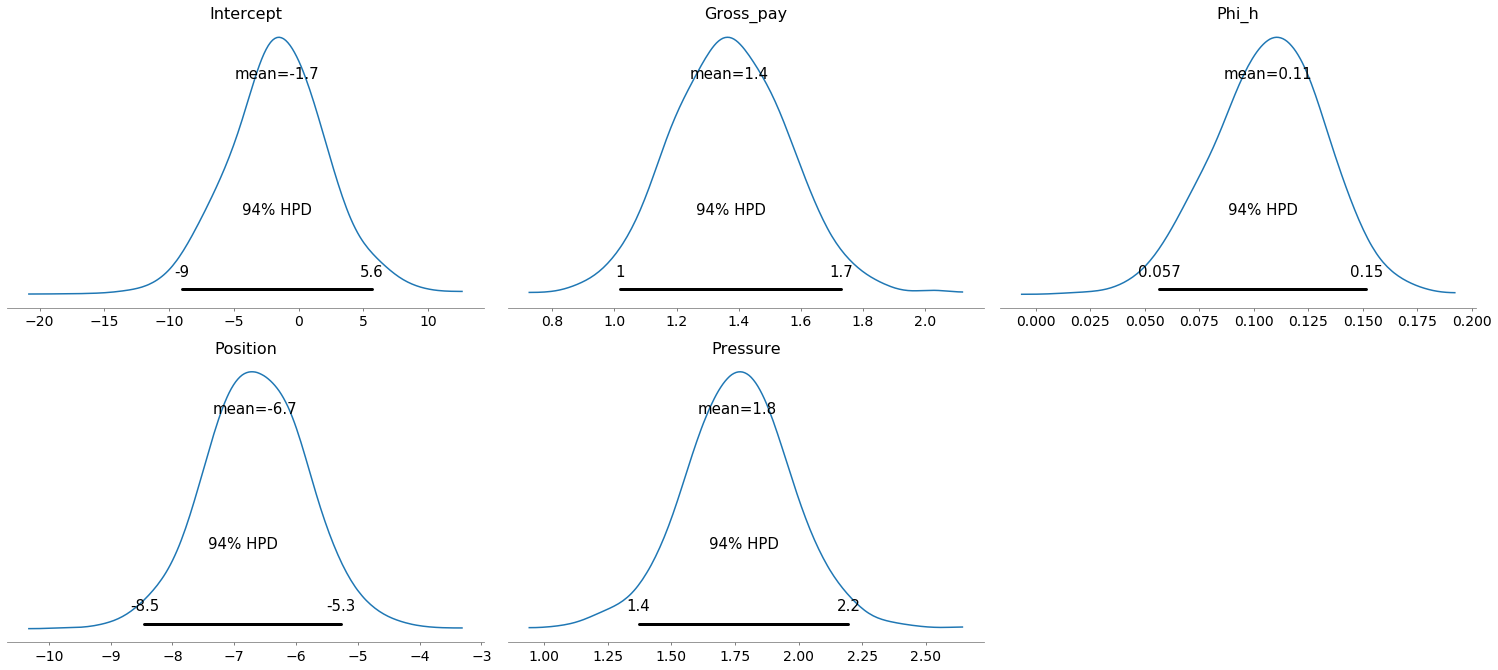

In [5]:
pm.plot_posterior(trace2[500:], varnames=['Intercept', 'Gross_pay', 'Phi_h', 'Position', 'Pressure'])

Our analysis yields the following relationship between the data: 

$$Y = -1.739 + 1.362 * \text{Gross_pay} + 0.108 * \text{Phi_h} - 6.601 * \text{Position} + 1.752 * \text{Pressure}$$

The article authors find:

$$Y = -1.71 + 1.37 * \text{Gross_pay} + 0.11 * \text{Phi_h} - 6.66 * \text{Position} + 1.76 * \text{Pressure}$$

Pretty close! But the authors state that *(...) the weights are not quite correct*.

***What can we do to get better estimates?***

Let's do some EDA. The scatter matrix below includes bivariate scatter-plots in the upper triangle, contours in the lower triangle, shape of the bivariate distributions on the diagonal.

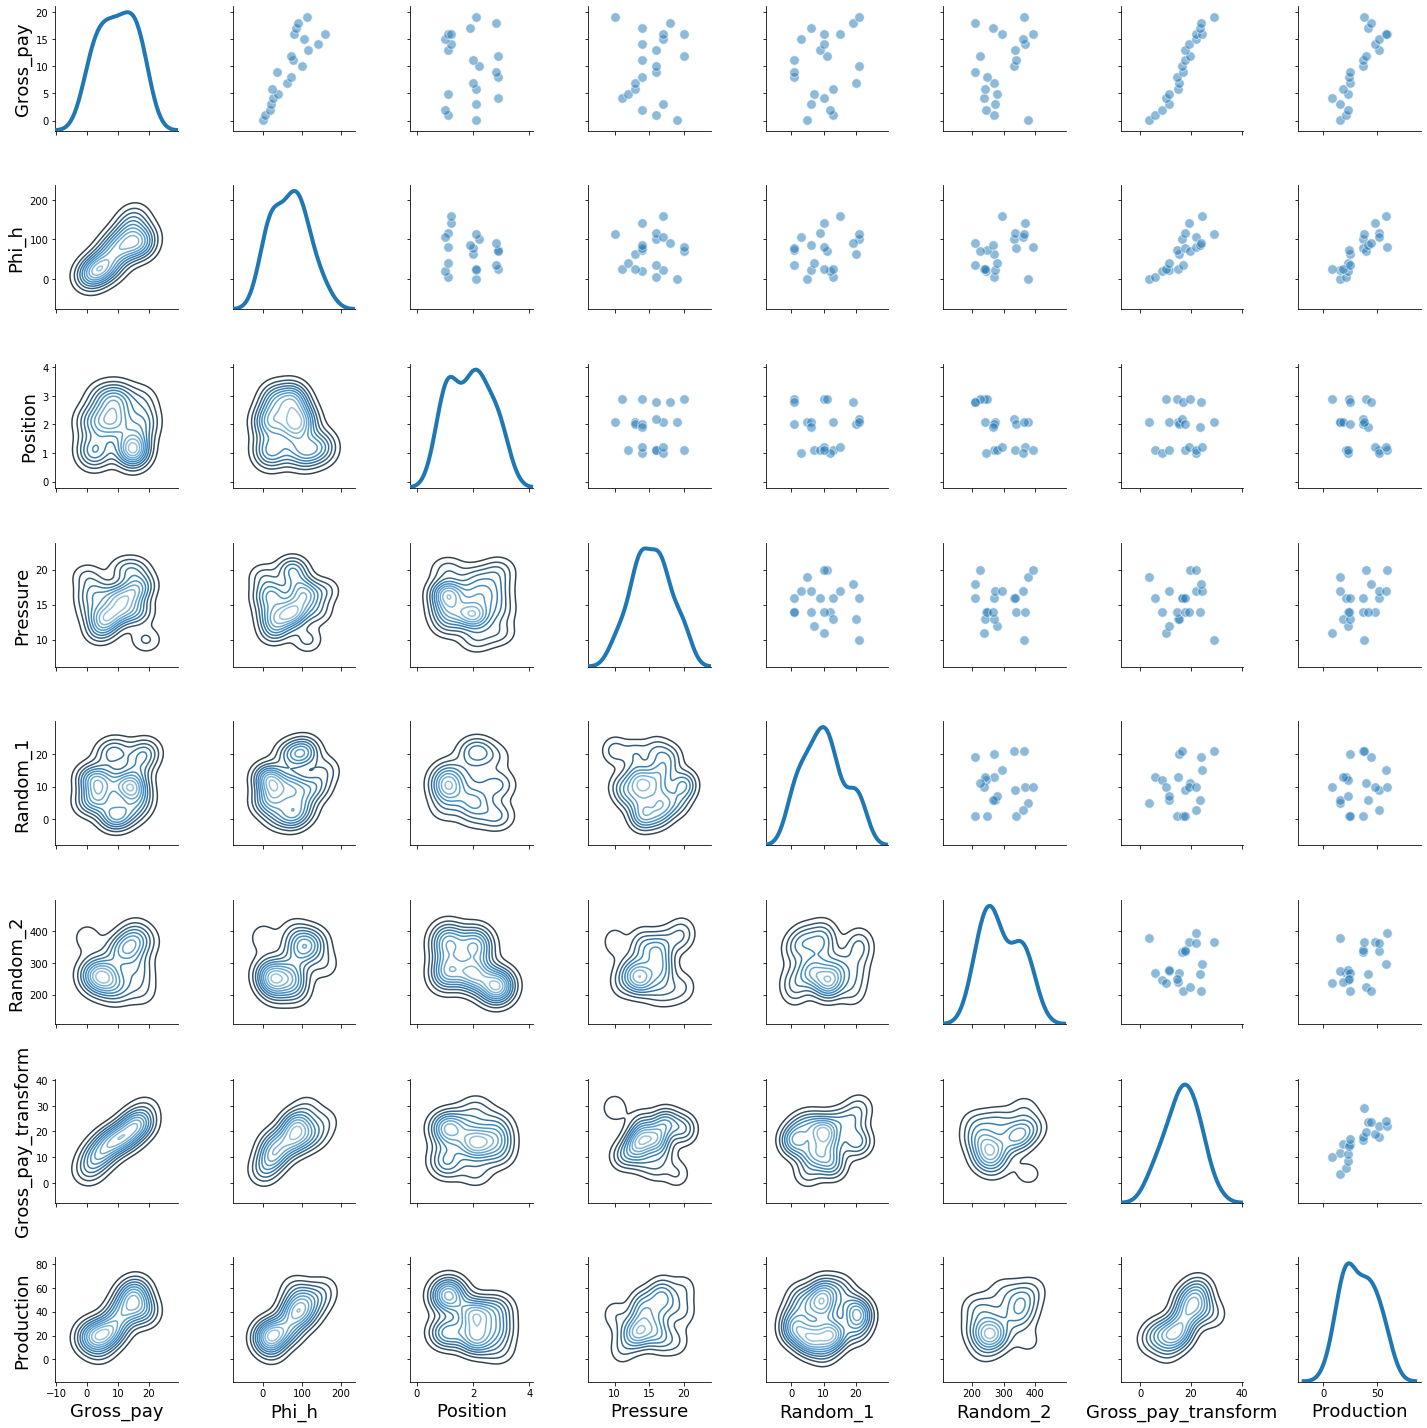

In [6]:
pyplot.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, 
            edgecolor="w", s=90, alpha=0.5)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

We now introduce new concepts:

- [Spearman rank correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) coefficient – a bit more robust than Pearson’s correlation coefficient. While Pearson's correlation assesses **linear relationships**, Spearman's correlation assesses **monotonic relationships** (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other
- [Confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the correlation coefficient. It is an interval estimate, computed from the statistics of the observed data, that might contain the true value of an unknown population parameter with a ceertain probability. Most commonly, the 95% confidence level is used.[4] However, other confidence levels can be used, for example, 90% and 99%
- Probability of [spurious correlation](https://en.wikipedia.org/wiki/Spurious_relationship). A spurious relationship or spurious correlation is a mathematical relationship in which two or more events or variables are associated but not **causally related**, due to either **coincidence** or the presence of a certain **third**, unseen factor, called **latent** factor

..from [this article](https://mycarta.wordpress.com/2019/03/17/visual-data-exploration-in-python-correlation-confidence-spuriousness/).

In [7]:
import numpy as np
import scipy.stats as st

def confInt(r, nwells):
    z_crit = st.norm.ppf(.975) 
    std_Z = 1/np.sqrt(nwells-3)      
    E = z_crit*std_Z
    Z_star = 0.5*(np.log((1+r)/(1.0000000000001-r)))
    ZCI_l = Z_star - E
    ZCI_u = Z_star + E
    RCI_l = (np.exp(2*ZCI_l)-1)/(np.exp(2*ZCI_l)+1) 
    RCI_u = (np.exp(2*ZCI_u)-1)/(np.exp(2*ZCI_u)+1)
    return RCI_u, RCI_l

In [8]:
def P_spurious (r, nwells, nattributes):
    t_of_r = r * np.sqrt((nwells-2)/(1-np.power(r,2)))  
    p = st.t.sf(numpy.abs(t_of_r), nwells-2)*2 
    ks = np.arange(1, nattributes+1, 1)
    return np.sum(p * np.power(1-p, ks-1))

In [9]:
def r_crit(nwells, a):
    t = st.t.isf(a, nwells-2) 
    r_crit = t/np.sqrt((nwells-2)+ np.power(t,2))
    return r_crit

In [10]:
nwells = 21
rc = r_crit(21, 0.025)

In [11]:
from matplotlib import pyplot
%matplotlib inline

def corrfunc(x, y, rc=rc, **kws):
    r, p = st.spearmanr(x, y)
    u, l = confInt(r, 21)  
    if r > rc:
       rclr = 'g'
    else:
        rclr= 'm' 
    if p > 0.05:
       pclr = 'm'
    else:
        pclr= 'g'
    ax = pyplot.gca()
    ax.annotate("CC = {:.2f}".format(r), xy=(.1, 1.25), 
                xycoords=ax.transAxes, color = rclr, fontsize = 14)
    ax.annotate("CI = [{:.2f} {:.2f}]".format(u, l), xy=(.1, 1.1), 
                xycoords=ax.transAxes, color = rclr, fontsize = 14)
    ax.annotate("PS = {:.3f}".format(p), xy=(.1, .95), 
                xycoords=ax.transAxes, color = pclr, fontsize = 14)

Now:

- The correlation coefficient is coloured green if it is larger than the critical r, else coloured in purple
- The confidence interval is coloured green if both lower and upper are larger than the critical r, else coloured in purple
- The probability of spurious correlation is coloured in green when below 0.05 (or 5% chance)

So, green means correlation, purple means probably no correlation.

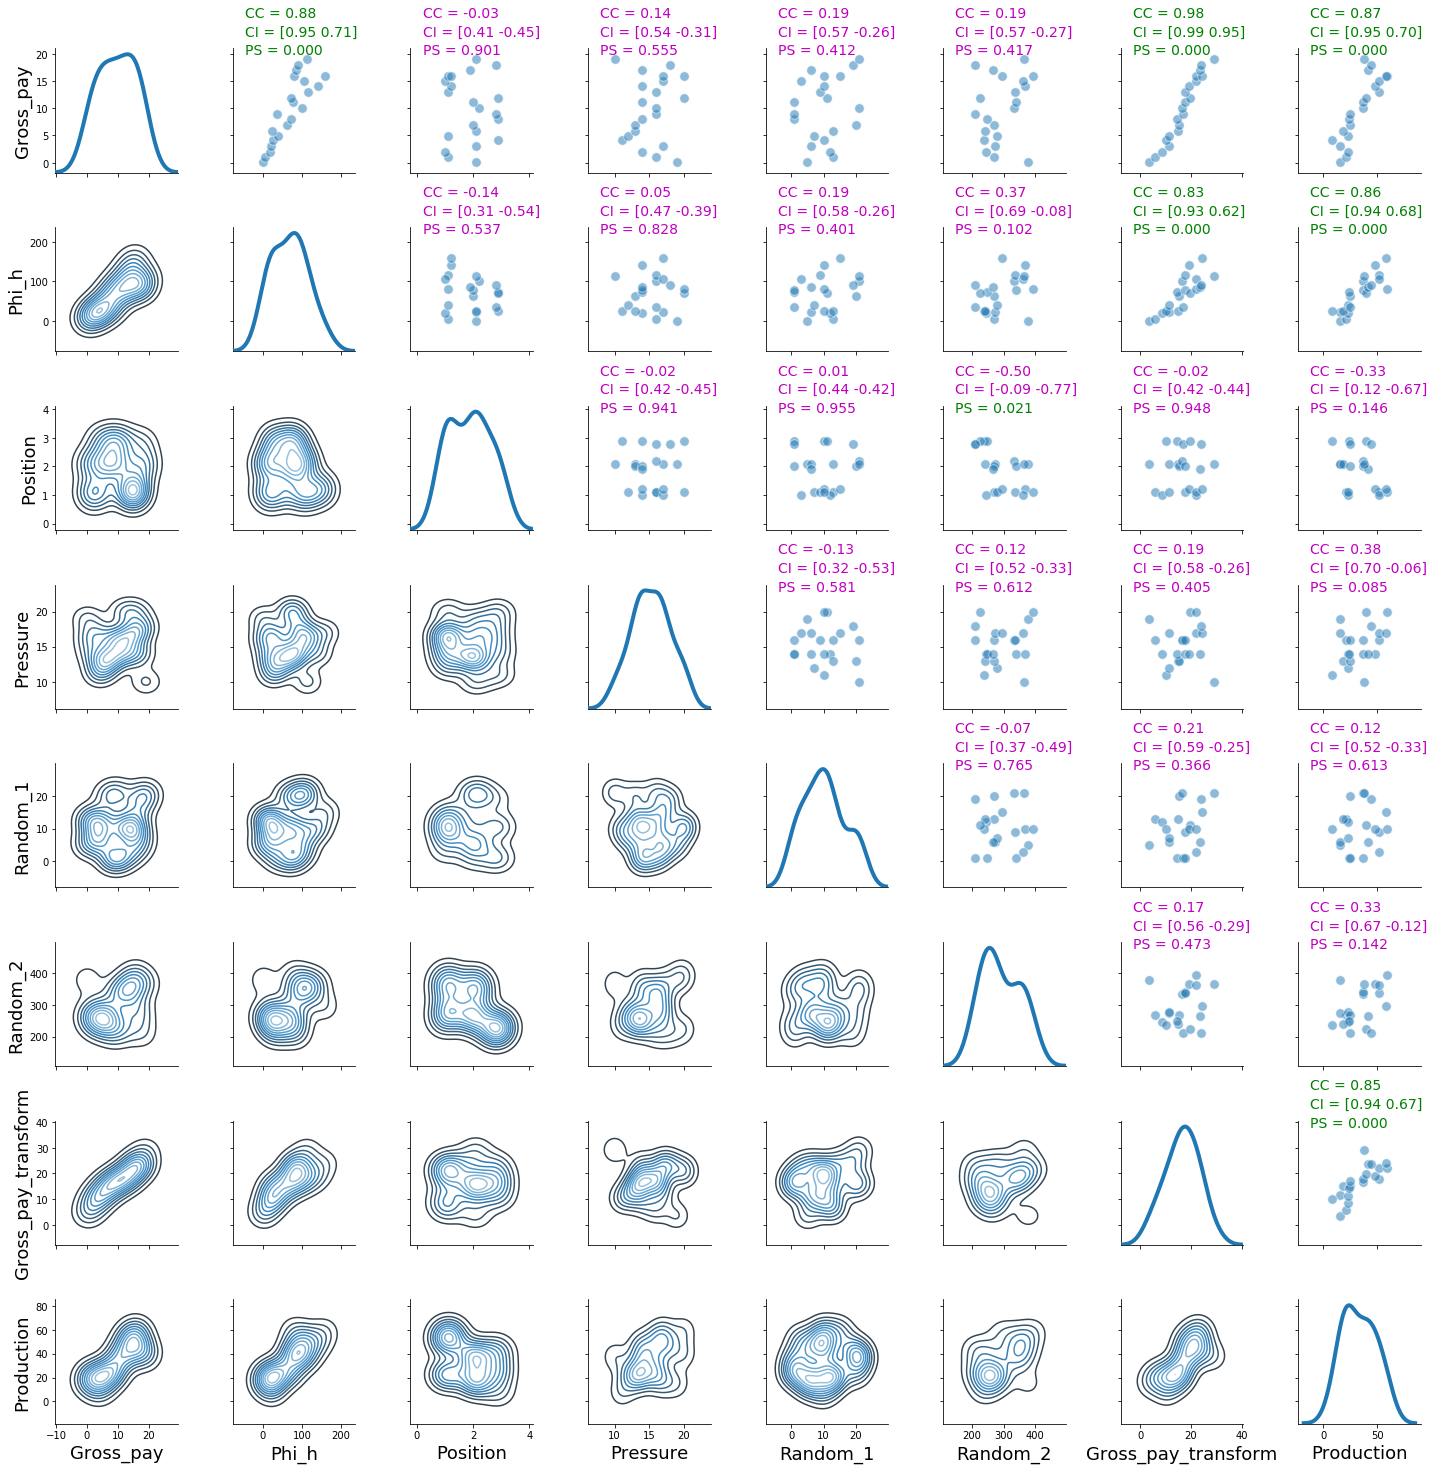

In [12]:
pyplot.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

The more ***interesting variables***, because of strong correlation (as defined in this case by the rank correlation coefficient), are close together and reposition along the diagonal, so we can immediately appreciate that `Production`, `Phi_h`, and `Gross_Pay`, plus to a lesser extent `Position` (albeit this one with negative correlation to production) are related to one another. 

But wait, there is better!

Unfortunately, could not `pip install biokit` on Windows (probably works on the Mac, try it if you can), and biokit is known to have ***awesome correlation plots***.

In [13]:
from biokit.viz import corrplot
corr = data.corr(method='spearman')
c = corrplot.Corrplot(corr)
c.plot(method='ellipse', cmap='PRGn_r', shrink=1, rotation=45, upper='text', lower='ellipse')
fig = plt.gcf()
fig.set_size_inches(10, 8);

ModuleNotFoundError: No module named 'biokit'

### Distance correlation

I learned about [distance correlation](https://en.wikipedia.org/wiki/Distance_correlation) [here](https://mycarta.wordpress.com/2019/04/10/data-exploration-in-python-distance-correlation-and-variable-clustering/), and the author learned it himself at the 2018 CSEG/CASP Geoconvention talk Data science tools for petroleum exploration and production. It was introduced in 2005 by [Gábor J. Székely](https://en.wikipedia.org/wiki/G%C3%A1bor_J._Sz%C3%A9kely) to address this deficiency of Pearson’s correlation.

Distance correlation ***does not assume a linear relationship between variables*** as does Pearson and Spearman, and even more importantly, whereas with Pearson and Spearman a correlation value of zero does not prove independence between any two variables, a ***distance correlation of zero does mean that there is no dependence between those two variables***! So in my opinion, it's more useful! [dcor](https://github.com/vnmabus/dcor) is the package, install it.
```(python)
pip install dcor
```

For example:

In [ ]:
import dcor
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], 
                                                                        data['Gross_pay'])))
print("p-value = {:.7f}".format(dcor.independence.distance_covariance_test(data['Production'], 
                                                                           data['Gross_pay'], 
                                                                           exponent=1.0, 
                                                                           num_resamples=2000)[0]))

In [ ]:
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]
    if pval:
        return (dc, pv)
    else:
        return dc

In [ ]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = pyplot.gca()
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)

Now coloring in Blue all high distance correlation coefficients reveal the independent columns in the data that are likely to have some kind of relationship with the dependent column that we picked. Now ***that*** is how you take a dataset, like MLB or NBA, and look for causal relationships!

In [ ]:
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show();

Now, we create a square matrix of distance correlation values, then we look at correlational clustering of the variables: Instead of passing raw data to the algorithm, let's pass the distance correlation matrix. 

In [ ]:
# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 

# Apply the distance method pairwise to every column
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt

Now isn't that a useful table!

Let’s calculate a couple of values directly, to be sure.

In [ ]:
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Phi_h'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Position'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Gross_pay'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Pressure'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Random_1'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Random_2'])))

What we expected: `Production` is related to both `Phi_h` and `Position`!

Now let's use the table above as a matrix, rather than the raw data, to cluster the variables, and then display the result with a [heat-map](https://en.wikipedia.org/wiki/Heat_map) and accompanying [dendrograms](https://en.wikipedia.org/wiki/Dendrogram).

In [ ]:
data.rename(index=str, columns={"Gross_pay_transform": "Gross_pay_tr"}, inplace=True)
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

#h = heatmap.Heatmap(rslt)
#h.plot(vmin=0.0, vmax=1.1, cmap='cubehelix')
#fig = plt.gcf()
#fig.set_size_inches(22, 18)
#plt.gcf().get_axes()[1].invert_xaxis();

# heatmap
#ax = sns.heatmap(rslt, linewidth=0.5)
#fig = pyplot.gcf()
#fig.set_size_inches(12, 8)
#pyplot.gcf().get_axes()[1].invert_xaxis();
#pyplot.show()

# heatmp + dendrogram
g = sns.clustermap(rslt, cmap="mako",  standard_scale =1)
fig = pyplot.gcf()
fig.set_size_inches(12, 12);

`Production`, `Phi_h`, `Gross_Pay`, and `Gross_pay_transform` group together, but now the observation is ***based on a much more robust metric***. `Position` is not as ***close***, and ends up in a different cluster, although its distance correlation from `Production` is 0.45, and the p-value is <0.10, hence it is still a relevant variable.

Recall, the [p-value](https://en.wikipedia.org/wiki/P-value) or **p**robability **value** is the probability of obtaining test results at least as extreme as the results actually observed during the test, ***assuming that the null hypothesis is correct***. If it's ***low***, we can safely assume that the null hypothesis is ***not correct***, and we have some correlation.

In conclusion, `Gross_pay`, and `Gross_pay_transform` are very much related to one another, with high dependence.

But I still do not know, in the context of variable selection for predicting `Production`, which one I should drop: We only know it should be `Gross_pay_transform` because the data is artificial!

For proper variable selection look at techniques like [Least Absolute Shrinkage and Selection Operator](https://en.wikipedia.org/wiki/Lasso_(statistics)) (LASSO) and [Recursive Feature Elimination](https://en.wikipedia.org/wiki/Feature_selection).

### Correlation matrix ordered by relevant features

With distance correlation, p-value, and plots rearranged by clustering.

In [ ]:
a = (g.dendrogram_col.reordered_ind)
a

 order of variables in the original DataFrame:

In [ ]:
b = list(data)
b

rearrange them with those reordered column indices:

In [ ]:
data = data[[b[i] for i in a]]
list(data)

In [ ]:
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

Do you see how the first three variables have correlation contours that are well differentiated, while the remaining ones are quite isotropic?

This is what you would ideally have done in terms of EDA, for your athletic teams homework: Find columns correlated to your dependent (to be modelled) variable, and use those, leaving uncorrelated columns alone.

- A ML algorithm that uses ***all*** columns is wasting CPU while ***learning values by heart*** * (as we will see in our upcoming deeper dive on regression forests), rather than **finding dependencies** between columns in order to do **intelligent**predictions. The opposite of intelligent predictions are **dumb predictions**, and AI is often not only ***not intelligent**, but also very ***dumb***.

Data science is about building a **model** and throwing away the data. First, you build the model based on ***independent columns*** that somehow correlate (not necessarily linearly) to the dependent variable, throwing away one of the pair of these columns that are self-correlated, for all possible pairings (so you throw away all the other irrelevant columns). Then you verify your model with test data that was not used in training. And then you throw away the data and keep the model :-) 

## 4. Covariance Matrix use case \#1: Financial risk

For financiers and investment analysts, the trade-off between risk and returns of financial securities are of utmost importance.

Investopedia defines Equity risk as one that:
- Covers the risk involved in the volatile price changes of shares of stock. Changes in prices because of market differences, political changes, natural calamities, diplomatic changes or economic conflicts may cause volatile foreign investment conditions that may expose businesses and individuals to foreign investment risk.

Basically, investors don’t like surprises. A highly volatile stock is one whose prices changes too fast. An equity’s risk is thus embedded in the volatility of its prices. So what’s the best measure of price volatilities (risk) in the world of Finance? Standard Deviation!

```(python)
pip install pandas-datareader --upgrade
```

<class 'pandas.core.frame.DataFrame'>


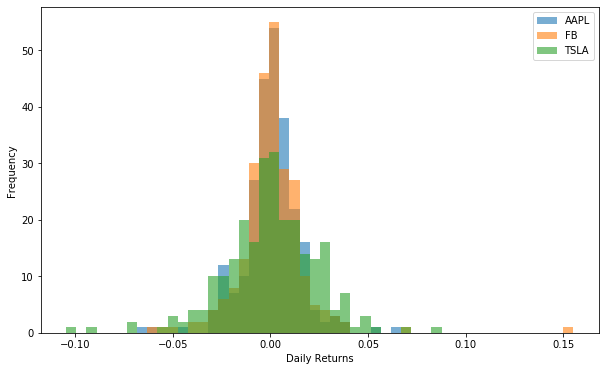

In [5]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

start = datetime(2016,1,1)
end = datetime(2017,1,1)

assets = ['AAPL', 'FB', 'TSLA']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Adj Close']

# Percentage change between the current and a prior element.
asset_returns_daily = df.pct_change()
asset_volatility_daily = asset_returns_daily.std()

print(type(asset_returns_daily))

asset_returns_daily.plot.hist(bins=50, figsize=(10,6),alpha = 0.6);
plt.xlabel('Daily Returns')
plt.show()

The spread of daily returns of Tesla (TSLA) is the most volatile as it is the stock with the most widely ‘spreads’ of daily returns. Followed by Facebook and Apple with the least spreads.

A [portfolio](https://en.wikipedia.org/wiki/Portfolio_(finance)) is simply a single pool which contains two or more securities in that single pool.

The formula for measuring risk in a portfolio of various securities is:

$$\sigma_\text{portfolio} = \sqrt{w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2 w_1w_2\rho_{12}\sigma_1\sigma_2}$$

where:

$w_1$ = proportion of portfolio invested in asset \#1

$w_2$ = proportion of portfolio invested in asset \#2

$\sigma_1$ = standard deviation of returns of asset \#1

$\sigma_2$ = standard deviation of returns of asset \#2

$\rho_{12}$ = correlation coefficient between returns of assets \#1 and \#2

Note that $Cov_{12} = \rho_{12} * \sigma_1 * \sigma_2$.

With matrix algebra:

<br />
<center>
<img src="images/portfolio-variance.gif" width=400 />
</center>

Pandas to the rescue:

In [4]:
# correlation matrix of daily returns
df.corr()

,AAPL,FB,TSLA
AAPL,1.000000,0.602743,0.043634
FB,0.602743,1.000000,0.107923
TSLA,0.043634,0.107923,1.000000


In [5]:
df.describe()

,AAPL,FB,TSLA
count,252.000000,252.000000,252.000000
mean,99.260086,117.035873,209.767262
std,7.696804,8.899858,21.369476
min,85.651482,94.160004,143.669998
25%,91.797560,112.202499,196.639996
50%,99.838741,117.764999,208.705002
75%,105.676069,123.902502,223.282505
max,112.720345,133.279999,265.420013


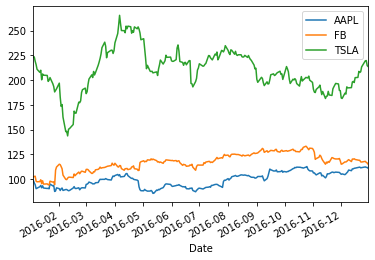

In [6]:
df.plot()

#### Exercise:  Calculate the Variance and Volatility...

of an equally weighted portfolio made up of five (5) stocks; Apple, General Motors, General Electric, Facebook and Walmart

In [8]:
df.var()

AAPL     59.240799
FB       79.207473
TSLA    456.654500
dtype: float64

In [9]:
df.std()

AAPL     7.696804
FB       8.899858
TSLA    21.369476
dtype: float64

<div style="display:none;">
from pandas_datareader import data as web
import pandas as pd
import numpy as np

assets =  ['AAPL', 'GM', 'GE', 'FB', 'WMT'] 

df = pd.DataFrame()  

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo',
                               start='2015-1-1' , end='2017-1-1')['Adj Close']

d_returns = df.pct_change()  

cov_matrix_d = d_returns.cov()
cov_matrix_a = cov_matrix_d * 250

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # assign equal weights

# calculate the variance and risk of the portfolo
port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))

percent_var = str(round(port_variance, 4) * 100) + '%'
percent_vols = str(round(port_volatility, 4) * 100) + '%'

print('Variance of Portfolio is {}, Portfolio Risk is {}'
      .format(percent_var, percent_vols))    
</div>

## 5. Covariance Matrix use case \#2: Multivariate distributions

So far we've only been looking at observations with a single feature. We call these **univariate**.

Let's branch off to multiple variables, or **mutli-variate data**. 

Initially we will assume that they are **independently normal distributed**. That is, each feature is normally distributed on its own, and there is no correlation between them.  This will allow us to evaluate how traditional anomaly detection performs on realistic data, because realistic data is seldom univariate. 

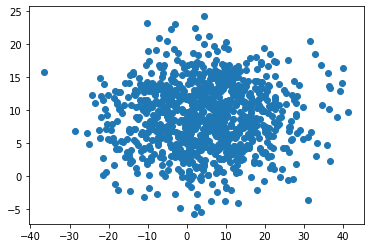

In [15]:
import numpy as np
N = 1000
X1 = np.random.normal(4, 12, N)
X2 = np.random.normal(9, 5, N)
plt.scatter(X1, X2)
plt.show()

In [16]:
x1_sample_mean = X1.mean()
x2_sample_mean = X2.mean()
x1_sample_sigma = X1.std()
x2_sample_sigma = X2.std()
print('Sample Mean 1:', x1_sample_mean)
print('Sample Mean 2:', x2_sample_mean)
print('Sample Standard Deviation 1:', x1_sample_sigma)
print('Sample Standard Deviation 2:', x2_sample_sigma)

Sample Mean 1: 4.538178620831754
Sample Mean 2: 8.972678799901857
Sample Standard Deviation 1: 12.000568217788192
Sample Standard Deviation 2: 4.974271288766018


Let's look at a heatmap of where we would expect to find observations given the 2D hisotgram implied by these distributions.

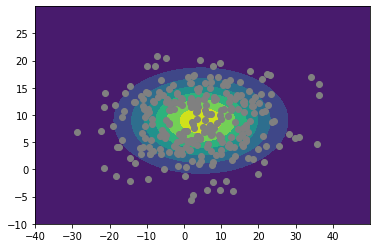

In [17]:
from scipy.stats import multivariate_normal

delta = 0.025
x1 = np.arange(-40, 50, delta)
x2 = np.arange(-10, 30, delta)
x, y = np.meshgrid(x1, x2)

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv = multivariate_normal([x1_sample_mean, x2_sample_mean], [[x1_sample_sigma**2, 0.], [0., x2_sample_sigma**2]])
plt.contourf(x, y, rv.pdf(pos))

thinned_points = np.array([n in np.random.choice(N, 300) for n in range(N)])
plt.scatter(X1[thinned_points], X2[thinned_points], c='gray')

Because the two variables are independent and uncorrelated, we get nice concentric circles (ellipses, really) for our 2D histogram.

Our histogram allows us to artifically generate data that looks like our empirical data.

As we move in towards the means (towards bright areas), we're increasingly likely to draw an observation that matches our empirical dataset. As we move away from the means (towards dark areas), we're less likely to generate a point that matches our dataset. We might decide that anything in the black region is **anomalous**.

Note that because the distribution of the x2 has a ***smaller variance***, the area of high probability is much thinner vertically than it is horizontally: our histogram is ***squished*** in the vertical dimension.

### Correlated Multivariate data

What if our two datasets x1 and x2 are **correlated**, for example the way domain names and URL lengths are correlated:

Let's build a 2D dataset where the two random variables are correlated.

---

#### Note -- np.array([n]*N)


In [18]:
import numpy as np
test = np.array([10]*8)
test

array([10, 10, 10, 10, 10, 10, 10, 10])

---

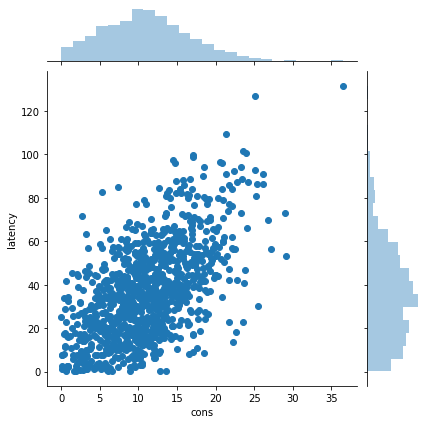

In [19]:
import seaborn as sns
def positive_support_normal(mean, sigma, n):
    xs = np.random.normal(mean, sigma, n)
    for i, num in enumerate(xs):
        while num < 0:
            num = np.random.normal(mean[i], sigma)
        xs[i] = num
    return xs
    
N = 1000

mu_cons = 10
sigma_cons = 6
sigma_latency = 20
beta = 3

cons = positive_support_normal(np.array([mu_cons]*N), sigma_cons, N)
latency = positive_support_normal(beta * cons, sigma_latency, N)
ax = sns.jointplot('cons', 'latency', pd.DataFrame({'cons': cons, 'latency': latency}))

If we use our previous uncorrelated histogram, we're clearly not going to match our data, as our data is **skewed** in the diagonal, towards the origin.

We can capture the correlation between x1 and x2 by filling in the values of the correlation matrix. But the problem is, we don't know what these values are!

Let's try a few different values.

---

#### Note -- The influence of Covariance Matrix to multi-guassian distribution

[blog](https://blog.csdn.net/weixin_37895339/article/details/80351541)

---

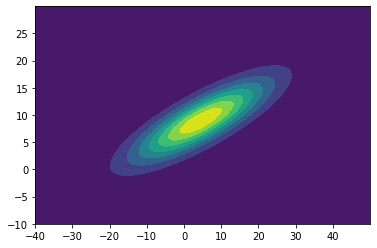

In [27]:
delta = 0.025
x1 = np.arange(-40, 50, delta)
x2 = np.arange(-10, 30, delta)
# Return coordinate matrices from coordinate vectors.
# 两个坐标轴上的点在平面上画格
x, y = np.meshgrid(x1, x2)

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

x1_x2_corr_sigma = 7
x2_x1_corr_sigma = 7

rv = multivariate_normal([x1_sample_mean, x2_sample_mean], 
                         [[x1_sample_sigma**2, x1_x2_corr_sigma**2], [x2_x1_corr_sigma**2, x2_sample_sigma**2]])
plt.contourf(x, y, rv.pdf(pos))

### Homework

We see that we capture our data better, but the problem is we do not know what the value of `x1_x2_sigma` might be.

Find the values of the correlation matrix

## 6. Multivariate Gaussian distribution in 3D

The plot below shows us in 3D, the independent multivariate gaussian distribution we introduced above.

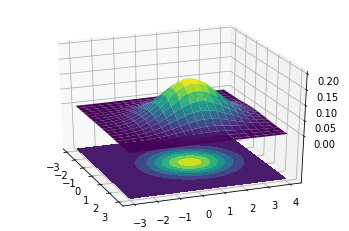

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0], [0,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

The matrix multiplication in the exponential is achieved with NumPy's `einsum` method. The single call:
```(python)
fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
```

could be written, in the two-dimensional case as:
```(python)
fac = np.einsum('ijk,kl,ijl->ij', x-mu, Sigma_inv, x-mu)
```

and is equivalent to the following sequence of products:
```(python)
fac = np.einsum('ijk,kl->ijl', pos-mu, Sigma_inv)
fac = np.einsum('ijk,ijk->ij', fac, pos-mu)
```

The first call here is simply the dot product of the $n_x$×$n_y$×2 array pos-mu and the 2×2 covariance matrix Sigma_inv (it could be replaced with np.dot(pos-mu, Sigma_inv)) and results in another $n_x$×$n_y$×2 array. This is really a $n_x$×$n_y$ matrix of vectors, and NumPy has a hard time taking the appropriate dot product with another $n_x$×$n_y$ matrix of vectors, pos-mu: ***we want a matrix of vector dot products, not a vector of matrix dot products***. 

`einsum` allows us to explicitly state which indexes are to be summed over (the last dimension, indicated by the repeated k in the string of subscripts 'ijk,ijk->ij').

- Since SciPy 0.14, there has been a multivariate_normal function in the scipy.stats subpackage which can also be used to obtain the multivariate Gaussian probability distribution function:

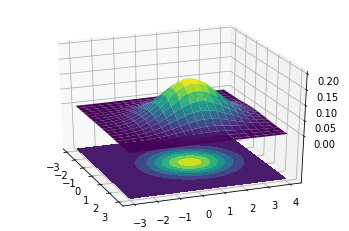

In [28]:
from scipy.stats import multivariate_normal
F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

Now, let's introduce some correlation between X & Y:

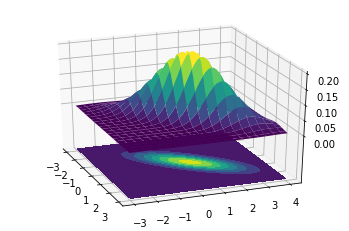

In [29]:
Sigma = np.array([[ 1. , 0.99], [0.99,  1.5]])

F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

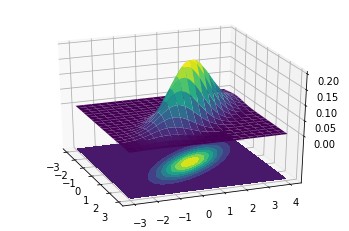

In [30]:
Sigma = np.array([[ 1. , -0.9], [-0.9,  1.5]])

F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

Do you see how we get a non-isotropic pattern, indicating correlation between X & Y?

## 7. Introduction to Gaussian Processes (GP)

Supervised learning can be divided into *regression* and *classification* problems. Whereas the outputs for classification are *discrete* (categorica) class labels, regression is concerned with the prediction of *continuous quantities*. For example, in a financial application, you may attempt to predict the price of a commodity as a function of interest rates, currency exchange rates, availability and demand. Or, given stats about World Cup teams, you may attempt to predict the winner of the next World Cup.

Gaussian Processes (GP) is the **state of the art** of regression modeling.

When we studied Baeysian estimation, we restricted the class of model functions to consider well known probability density functions arising in probability theory, such as **Poisson**, **Beta**, **Gamma** etc. 

Today, we're going to see that we can take priors to be *every possible function*, where higher probabilities are given to functions that we consider to be more likely, for example because they're smoother.

Has professor gone mad?! How is it possible to consider *all* possible functions? There are so many!

</br >
<center>
<img src="images/crazyprof.png" width=300 />
</center>

### GP definition

A **Univariate** Gaussian is a distributions over real valued variables.

A **Multivariate** Gaussian is a tuple (e.g. pairs for 2 random variables, triplets for 3 random variables, etc.) of real valued variables.

A **Gaussian Process** is not a countable sequence anymore! It's a **function** of (infinite numbers of) real
valued variables.

For example: Assume I want to measure my heart rate. I bike a lot, so my resting heart rate is around 50 bpm. When I competed actively, it could hover sometimes around 39. Suppose I want to measure my heart rate 4 times a day: morning, lunch, afternoon, and bedtime. Each day, 4 times a day, I would get a measurement (different every day). From the data, I would use Bayesian estimation to evaluate the pdf of my heart rate, complete with mean and standard deviation, and plotted as a 4D mutlivariate gaussian (it would be a univariate gaussian in the morning, ***another*** univariate gaussian at lunch, ***yet another*** in the afternoon, ***and another*** at bedtime). Since some days I am well-rested, and others I may be sick or tired, I'm assuming there will be a degree of correlation between the measurements in the morning, lunch, afternoon, and bedtime. For example, if I'm very tired and have a high heart rate in the morning, chances are it will be high at lunch, too! So I expect to see a non-isotropic 4D gaussian (well, not really see, for I cannot see a 5D-plot, but let's just say *imagine* as a 3D generalization).

Then assume I get tired of measuring 4 times a day, and decide to buy a Polar watch, that automatically logs heart rate ***every 10 minutes a day***.

</br >
<center>
<img src="images/polar-hr.jpg" width=200 />
</center>

There are 24 * 6 = 144 10-minute intervals a day, so now I have a 144D mutlivariate Gaussian. 

Assume I go nuts and decide to measure heart-rate every 10 seconds. How many dimensions does my mutlivariate Gaussian have? And what's the correlation between each univariate Gaussian? Pretty high, right?

Let's take this process to the limit, where I essentially start sampling from a **function** defined over a day on the x-axis, and heart-rate on the y-axis. That function is a [gaussian process](https://en.wikipedia.org/wiki/Gaussian_process).

Whereas a multivariate Gaussian distribution is determined by its **mean** and **covariance matrix**, a Gaussian process is determined by its **mean function**, $\mu(s)$, and **covariance function**, $C(s,t)$. 

The mean function defines the mean height of the function at each point and covariance function affects properties like the smoothness of the function, periodicity, etc. by saying how correlated each pair of points is.

You can approximate a Gaussian process on an interval by selecting S to be a grid of evenly spaced points in that interval. Then to sample from the process, you can just sample a multivariate Gaussian distribution with a covariance matrix defined by your covariance function and your mean vector defined by your mean function. If you plot your sample versus your grid, you will see a smooth curve (assuming you used a common covariance function, like the power exponential).

### Countably infinite and uncountably infinite sets

Whereas a probability distribution describes random variables which are scalars, or vectors for multivariate distributions, a *stochastic process* governs the properties of *functions*. 

And yes I know, there are an [uncountably](https://en.wikipedia.org/wiki/Uncountable_set) infinite set of functions! How are we going to compute with this set in a finite amount of time? 

We *can* deal computationally with these infinite dimensional objects because if you ask *only* for the properties of the function at a *finite* number of points (our observations), then inference in the Gaussian process will give you the same answer whether you have infinitely many other points or not.

You *can* loosely think of a function as a *very long vector* (collection), each entry of which specifies the function value $f(x)$ at a particular input $x$, right? And if our collection $[x]$ is finite, then our $[f(x)]$ collection is finite, too.

So let's consider a simple 1-d regression problem, mapping from an input $x$ to an output $f(x)$.
In the figure below we show a number of sample functions drawn at random from our prior distribution over functions which favours smooth functions. Then we freeze two observations in our posterior, so that immediately reduces the functions that we can use to those that cross these two observations. 

</br >
<center>
<img src="images/gp-prior-posterior.png" width=500 />
</center>

So, how many functions do you think we can fit through 2 points? How many functions do you think we can fit through 5 points?
Remember our Vandermonde matrices? Specifying the points we want the polynomial to go through *froze* the polynomial for us. Let's freeze 5 points:

```python
# freeze 4 observations that our functions needs to go through
x1 = numpy.array([-3.2, -1.5, 0.3, 0.7, 2.5])    # points where we know values
y = numpy.array([ 4.5,  0.5, 0.6, 1.2, 3.5])     # values at those points
```

Go ahead, play with the observations below, modify them. You will always have the originals here above!

[-0.03180657 -0.1257808   0.64265738  0.97515726  0.25326737]
B = [[ 1.048576e+02 -3.276800e+01  1.024000e+01 -3.200000e+00  1.000000e+00]
 [ 5.062500e+00 -3.375000e+00  2.250000e+00 -1.500000e+00  1.000000e+00]
 [ 8.100000e-03  2.700000e-02  9.000000e-02  3.000000e-01  1.000000e+00]
 [ 2.401000e-01  3.430000e-01  4.900000e-01  7.000000e-01  1.000000e+00]
 [ 3.906250e+01  1.562500e+01  6.250000e+00  2.500000e+00  1.000000e+00]] 
p = [-0.03180657 -0.1257808   0.64265738  0.97515726  0.25326737]
p(x) = -0.03180657205425007x^4 + -0.12578079528543923 x^3 + 0.642657379886482 x^2 + 0.97515726018048 x + 0.253267372462419 is the unique cubic polynomial that interpolates these points.


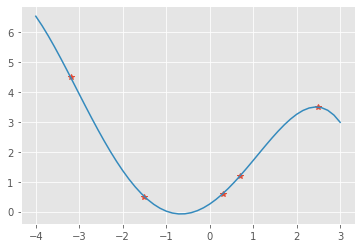

In [3]:
%matplotlib inline
import numpy
from matplotlib import pyplot
pyplot.style.use('ggplot')

# our x-axis and our vandermonde degree 3 matrix
x = numpy.linspace(-4, 3)
A = numpy.array([x**4, x**3, x**2, x, 1+0*x]).T

# freeze 5 observations that our functions needs to go through
x1 = numpy.array([-3.2, -1.5, 0.3, 0.7, 2.5])    # points where we know values
y = numpy.array([ 4.5,  0.5, 0.6, 1.2, 3.5])     # values at those points

pyplot.plot(x1, y, '*')
B = numpy.vander(x1)                     # Vandermonde matrix at the known points
p = numpy.linalg.solve(B, y)             # Compute the polynomial coefficients
print(p)
pyplot.plot(x, A.dot(p))                 # Plot the polynomial evaluated at all points
print('B =', B, '\np =', p)
print('p(x) = ' + str(p[0]) + 'x^4 + ' + 
                  str(p[1]) + ' x^3 + ' + 
                  str(p[2]) + ' x^2 + ' + 
                  str(p[3]) + ' x + ' + 
                  str(p[4]) + ' is the unique cubic polynomial that interpolates these points.')

There may be a single quartic polynomial that passes through these points, but there is a countably infinite nunmber of functions that pass through these 5 points when we consider ***all possible functions***, including polynomials higher than quartic, exponentials, gaussians, Poissons, Gammas, etc.

### Learning in a Gaussian Process

Ok, the example above just a quartic polynomial and our space of all possible functions consists of ***much much more*** than quartic polynomials.

- So we have more choices and more functions that cross these points (in fact, still an uncountable infinite set)

But we *did manage to restrict* our function space, if you can still talk about restricing uncountably infinite sets. If we pick ***very smooth functions***, these will oscillate so much, that they will predict gold deposits ***out of this world*** at some points, if we're Danei Krige and prospecting for gold. That's *no good*.

</br >
<center>
<img src="images/analytic-interpolations.png" width=400 />
    *smooth high-degree polynomial functions oscillate **a lot***
</center>

Gaussian processes (GPs) define a distribution on continuous functions with a continuous domain. We observe some points and want to assign probabilities to every possible way a curve could be drawn through those points. 

- The hope is the curves with highest probability are very similar to that true function we can (usually) never observe (e.g. the gold deposit profile under the mountain). Then the question is how to assign probability to each curve. 

GPs parameterize the probability in terms of a $n$x$n$ covariance matrix: A distance function (also called a **kernel function** of the user's choice) is calculated for ***every pair*** of the $n$ total **observed points**. 

- So we have a mulitvariate distribution, right? If we have N observation points, we have ourselves an N-variate distribution in N-D space. 

All this matrix does is control the GP's preference for **smoothness**. 

- If the kernel function results in a **high value** for one pair of points, then the GP assigns a **higher probability** to functions that connect those points with a relatively *simple* curve, like a **line** (smooth, doesn't have a bunch of wiggles). 

What is considered smooth or not is determined by the kernel function.

- Although the specific random functions that cross these points do not have a **mean** of zero, you can imagine that as we plot more and more of them, the mean of $f(x)$ values for any fixed $x$, for all these functions combined, would go to zero independently of $x$. 

We can also characterize the *variability* of each of these functions, by computing the pointwise difference between all possible pairs $(p,q)$ of cov$_{(p,q)}(f(x_p)$, $f(x_q))$ in our interval of interest. 

- The more herky-jerky the function $f$ is, the higher the variance. The smoother $f$ is, the lower the variance. 

So each of these functions $f$ that we consider has a **covariance matrix**. In fact, it is well characterized by this matrix. What functions $f$ do we need so that the covriance matrix can be put in the form of a matrix of squared exponentials like so:

$$cov_{(p,q)}(f(x_p), f(x_q) = exp(-\frac{1}{2}(x_p - x_q)^2)$$

It turns out, if you do the math, that if our functions $f$ are linear combinations of gaussians, the equality above holds well. We'll reexamine this in the math section of this document. 

- It can be shown (with math) that a squared exponential covariance function corresponds to a Bayesian **linear regression** model. 

Also, we can also obtain that covariance function from a linear combination of an infinite number of Gaussian-shaped functions. This is called [Mercer's theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem).

Ok, good, so that is the process:

- We have a **prior distribution of functions** (see figure (a) above), the same way we had prior distributions for each model parameter in Bayesian estimation. 

- We then observe **data points**. That freezes our covariance matrix for each of these functions in the prior distribution of functions. 

If we have 30 data points, the covariance matrix for each function $f$ will be a 30 x 30 matrix, and the matrix will contain in each cell the covariance between all pairs of these 30 points. 

- Our family of priors are ***shoehorned*** through these data points $(x_p, y_p)_p$ by ensuring that $f(x_p) = y_p$ for each $p$. This downselects our possible priors and yields our **posterior distribution of functions** (see figure (b) above).

</br >
<center>
<img src="images/shoehorn.jpg" width=300 />
    *Shoehorn*
</center>

Even when a lot of observations have been added, there is still a lot of flexibility left in the functions $f$ we can choose, because the cardinality of function is [Aleph-1](https://en.wikipedia.org/wiki/Aleph_number).

Note that this process is called a **non-parametric model**. We had to find particular parameters for a *cubic polynomial* to go through some datapoints because the set of all possible cubic polynomials is infinitely smaller than the set of all possible functions. Likewise, you'd have to find the right $(\alpha, \beta)$ parameters for a $Gamma$ to match any histogram (as you did in your homework). But with GPs, we have an *infinite* number of functions to play with!

-  It turns out that Bayesian non-parametric methods do not imply that there are no parameters, but rather that the number of parameters ***grows with the size of the dataset***. In fact, Bayesian non-parametric models are **infinitely parametric**.

Keep in mind we still end up with **hyperparameters** for MCMC methods to optimize. But these hyperparameters will be *global* to our data, not determined by *local* considerations about which points to go through.

- These hyperparameters will control the **smoothness** (that is a *global* characteristic) of the functions $f$ we will pick. And that smoothness is determined for each function $f$ by its covariance matrix over the datapoints. 

The problem of *learning* in a Gaussian processes is exactly the problem of finding suitable *local* properties for the covariance matrix (*local* because the covariance matrix depends on the datapoints), which gives us functions that go though the data and thus model the underlying process that generates this data, as well as *global* characteristics of the data (smoothness, length-scale, etc.) that we can interpret.

So you see, GPs are quite different from the classical pdfs used in Bayesian estimation (Poisson, Gamma, etc.). 

- Remember how your brain works: Your brain is essentially a giant **geometry machine**, building curves that pass through our experiences (datapoints) and help us build models that generalize rules about life, which we follow as best we can in order to maximize our happiness.

For example: for maximum happiness with INFO 6105, study *very hard* for the midterm :-)

</br >
<center>
<img src="images/happy-students.png" width=400 />
    *Happy the students with great grades*
</center>

## 8. Prior and posterior functions

Let's demonstrate how we obtain realizations from a Gaussian process, which result in an evaluation of a function over a set of points. 

- All we will do here is sample from the *prior* Gaussian process, so before any data have been introduced. What we need first is our covariance function, which will be the squared exponential, and a function to evaluate the covariance at given points (resulting in a covariance matrix).

In [62]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

np.random.seed(42)

def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

We are going to generate realizations sequentially, point by point, using multivariate Gaussian distributions. 

### First, a bit of probability theory review:

A **joint probability** is a statistical measure where the likelihood of two events occurring *together* and *at the same point in time* are calculated. Joint probability is the probability of event Y occurring at the same time event X occurs. We talk about $P(X∩Y)$ or $P(X \text{and} Y)$ or $P(XY)$. 

What's the probability that you get snake-eyes (two 1's) with two dice, where X is the probability of one and Y the probability of the other? $1/6 * 1/6 = 1 / 36$, right?

Likewise, from a deck of 52 cards, the joint probability of picking up a card that is red ***and*** an ace is $P(\text{ace} ∩ \text{red}) = 2/52 = 1/26$, since a deck of cards has two red aces – the ace of hearts and the ace of diamonds. You can also use a formula to calculate the joint probability: $P(\text{ace} ∩ \text{red}) = P(\text{ace}) * P(\text{red}) = 4/52 * 26/52 = 1/26$.

Don't confuse **joint probability** with **conditional probability** - the probability that one event will happen *given* that another action or event *has happened*. The conditional probability form is $P(X│Y)$ – that is, the chance of one event happening is conditional on another event happening. For example, from a deck of cards, the probability that you get an ace, given that you drew a red card is $P(\text{ace}│\text{red}) = 2/26 = 1/13$, since there are two aces out of 26 red cards. Not the same as $1/26$, right?

### Then, a bit of linear algebra :-)

However, if we have the joint probability of two variables $x_1$ and $x_2$, characterized by the mean of each $\mu_1$ and $\mu_2$, and covariance matrix of the 4 possible standard deviations (self for each $\sigma_{11}$ and $\sigma_{22}$, and cross for each $\sigma_{12}$ and $\sigma_{21}$):

$$\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
\sim \mathcal{J} 
{\left(
\begin{pmatrix}
\mu_1 \\
\mu_2
\end{pmatrix}
,
\begin{pmatrix}
\sigma_{11} & \sigma_{12}\\
\sigma_{21} & \sigma_{22}\\
\end{pmatrix}
\right)}$$

It is possible to get the conditional probability $\mathcal{C}$ of one of the variables given the other (there's some math involved, just trust me on this).

Now instead of variables $x_1$ and $x_2$, assume we have a sequence of functions $f_1, \cdots, f_n$, and that some ($f$) are known (training data) while some ($f_*$) are unknown (test data). In classic Bayesian inference terminology, we talk about the known ones as *priors*, and the unknown ones as *posteriors*. In Machine learning terminology, we talk about *training data* and *test data*. But, same thing! 

We write:

$$\begin{pmatrix}
f \\
f_*
\end{pmatrix}
\sim \mathcal{C} \;
{\left(
\begin{pmatrix}
\mu \\
\mu_*
\end{pmatrix}
,
\begin{pmatrix}
K & K_*\\
K_*^T & K_{**}\\
\end{pmatrix}
\right)}$$

Here, $K$ is the matrix we get by applying a `kernel function` to our prior functions $(f)$, i.e. the similarity of each prior
to each other prior. $K_*$ gets us the similarity of the training values to the test values (or priors to posteriors) whose output values we’re trying to estimate. $K_{∗∗}$ gives the similarity of the test values (posteriors) to each other. 

The two most commonly used kernel functions in GP modeling are the *Gaussian*, and the *Matern 5/2*. The Gaussian is:

$$k(x, x') = \mathrm{exp}\left[ -\frac{(x - x')^2}{2 \ell^2} \right]$$

and for an equally spaced sampling of $x$'s tend to look like:

</br >
<center>
<img src="images/gaussianpriors.png" width=500 />
</center>

and the Matern 5/2 is:

$$k(x, x') = \left(1 + \frac{\sqrt{5(x - x')^2}}{\ell} +
            \frac{5(x-x')^2}{3\ell^2}\right)
            \mathrm{exp}\left[ - \frac{\sqrt{5(x - x')^2}}{\ell} \right]$$
            
and for an equally spaced sampling of $x$'s tend to look (much smoother, right?) like:

</br >
<center>
<img src="images/maternpriors.png" width=500 />
</center>
            
Ok, so how do we get the priors and posteriors? We get the priors by conditioning the gaussians (or the Materns) in the covariance matrix on our training datapoints. And we get the posteriors by MCMC-sampling from the posterior!

:-)

### Why Gaussians?

Adopting a set of Gaussians (a multivariate normal vector) as our multivariate distributions confers a number of advantages. First, the [marginal distribution](https://en.wikipedia.org/wiki/Marginal_distribution) of any subset of elements from a multivariate normal distribution is ***also normal***:

$$p(x,y) = \mathcal{N}\left(\left[{
\begin{array}{c}
  {\mu_x}  \\
  {\mu_y}  \\
\end{array}
}\right], \left[{
\begin{array}{c}
  {\Sigma_x} & {\Sigma_{xy}}  \\
  {\Sigma_{xy}^T} & {\Sigma_y}  \\
\end{array}
}\right]\right)$$

$$p(x) = \int p(x,y) dy = \mathcal{N}(\mu_x, \Sigma_x)$$

Also, if you have a multivariate normal vector${\boldsymbol Y} \sim \mathcal{N}(\boldsymbol\mu, \Sigma)$, consider partitioning $μ$ and $Y$ into:

$$\boldsymbol\mu
=
\begin{bmatrix}
 \boldsymbol\mu_1 \\
 \boldsymbol\mu_2
\end{bmatrix}$$

$$\boldsymbol Y
=
\begin{bmatrix}
 \boldsymbol y_1 \\
 \boldsymbol y_2
\end{bmatrix}$$

with a similar partition of $Σ$ into

$$\begin{bmatrix}
\Sigma_{11} & \Sigma_{12}\\
\Sigma_{21} & \Sigma_{22}
\end{bmatrix}$$

Then, $({\boldsymbol y}_1|\;{\boldsymbol y}_2={\boldsymbol a})$, the conditional distribution of the first partition given the second, is $\mathcal{N}(\overline{\boldsymbol\mu},\overline{\Sigma})$ with mean:

$$\overline{\boldsymbol\mu}=\boldsymbol\mu_1+\Sigma_{12}{\Sigma_{22}}^{-1}({\boldsymbol a}-\boldsymbol\mu_2)$$

and covariance matrix:

$$\overline{\Sigma}=\Sigma_{11}-\Sigma_{12}{\Sigma_{22}}^{-1}\Sigma_{21}$$

[Here](http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/node7.html) is the full proof, if you're interested. So, we can write that conditionals distributions of a subset of a multivariate normal distribution (conditional on the remaining elements) are normal too:

$$p(x\;|\;y) = \mathcal{N}(\mu_x + \Sigma_{xy}\Sigma_y^{-1}(y-\mu_y), 
\Sigma_x-\Sigma_{xy}\Sigma_y^{-1}\Sigma_{xy}^T)$$

You can find all the math in [RW](http://www.gaussianprocesses.org/), or also, [here](http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/).

### What to remember for the mid-term

A Gaussian process generalizes the multivariate normal to **infinite dimensions**. It is defined as an **infinite collection of random variables**, any finite subset of which has a multivariate Gaussian distribution. Another way of thinking about an **infinite vector** is as a **function**. When we write a function that takes continuous values as inputs, we are essentially specifying an infinte vector that only returns values (indexed by the inputs) when the function is called upon to do so. 

- So we are never required to store all the elements of the Gaussian process, only to calculate them on demand. That is the great advantage of functions: We don't need to store the data; the function computes the data ***on demand***! 

That is why we spent so much time on **generators**: Generators are functions that compute datapoints on demand. A function is the *perfect* ***low-dimensional*** model of the world. ***That is*** what your brain does: models functions out of yor life's experience.

- If you want to store all natural numbers, you need infinite RAM. A much simpler alternative is to store the generator function that generates them!

So, a Gaussian process is a ***distribution over functions***. 

- Just as a **univariate gaussian distribution** is completely specified by a **mean** and a **standard deviation**; just as a **multivariate normal distribution** is completely specified by a **mean vector** and **covariance matrix**, so a GP is fully specified by a **mean function** and a **covariance function**:

$$p(x) \sim \mathcal{GP}(m(x), k(x,x^{\prime}))$$

- It is the marginalization property that makes working with a Gaussian process ***feasible***: we can marginalize over the infinitely-many variables that we are not interested in, or have not observed. 

For example, one specification of a GP might be as follows:

$$\begin{aligned}
m(x) &=0 \\
k(x,x^{\prime}) &= \theta_1\exp\left(-\frac{\theta_2}{2}(x-x^{\prime})^2\right)
\end{aligned}$$

Here, the covariance function is a **squared exponential**, for which values of $x$ and $x^{\prime}$ that are close together result in values of $k$ closer to 1 and those that are far apart return values closer to zero. 

- It may seem odd to simply adopt the zero function to represent the mean function of the Gaussian process -- surely we can do better than that! It turns out that most of the learning in the GP involves the covariance function and its parameters, so very little is gained in specifying a complicated mean function.

For a *finite number of points*, the GP becomes a **multivariate normal**, with mean and covariance **values** as the mean function and covariance function ***evaluated at those points***.

So, once again, the conditional of mutlivariate Gaussian distributions is:

$$p(x|y) = \mathcal{N}(\mu_x + \Sigma_{xy}\Sigma_y^{-1}(y-\mu_y), 
\Sigma_x-\Sigma_{xy}\Sigma_y^{-1}\Sigma_{xy}^T)$$

And this the function that implements it, with a bit of linear algebra:

In [37]:
def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

Let's start with a Gaussian process prior with hyperparameters $\theta_0=1, \theta_1=10$. We will also assume a zero function as the mean, so we can plot a band that represents one standard deviation from the mean.

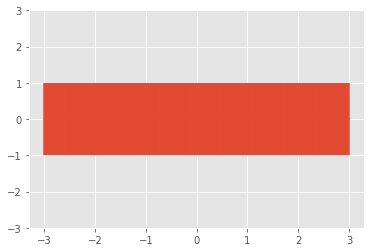

In [38]:
θ = [1, 10]
σ_0 = exponential_cov(0, 0, θ)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)
plt.ylim(-3, 3);

Let's select an arbitrary starting point to sample, say $x=1$. Since there are no prevous points, we can sample from an unconditional Gaussian:

In [39]:
np.random.seed(42)
x = [1.]
y = [np.random.normal(scale=σ_0)]
y

[0.4967141530112327]

We can now update our confidence band, given the point that we just sampled, using the covariance function to generate new point-wise intervals, conditional on the value $[x_0, y_0]$. 

In [40]:
σ_1 = exponential_cov(x, x, θ)

In [41]:
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

In [42]:
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, θ, σ_1, y) for i in x_pred]

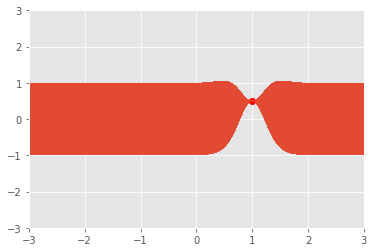

In [43]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);

So conditional on this point and the covariance structure we have specified, we have essentially constrained the probable location of new additional points. 

Let's now sample another:

In [44]:
m, s = conditional([-0.7], x, y, θ)
y2 = np.random.normal(m, s)
y2

-0.1382640378102619

This point is added to the realization, and can be used to further update the location of the next point.

In [45]:
x.append(-0.7)
y.append(y2)

In [46]:
σ_2 = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]

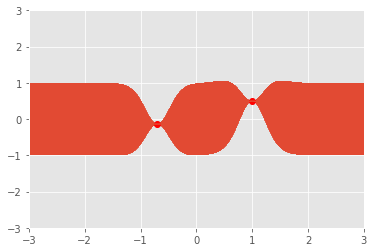

In [47]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);

We can just as easily sample several points at once:

In [48]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, θ)
y_more = np.random.multivariate_normal(mu, s)
y_more

array([-1.5128756 ,  0.52371713, -0.13952425, -0.93665367, -1.29343995])

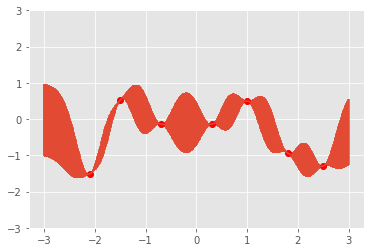

In [49]:
x += x_more
y += y_more.tolist()

σ_new = exponential_cov(x, x, θ)

predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.ylim(-3, 3);

So, given our covariance function, we have constrained interpolation to pass through the red areas in the plane above. Of course, interpolation needs to pass through the observations (datapoints). And then we need to finally pick an interpolating function inside the red surface area.

## 9. Comparison with Bayesian Estimation

Here, we have a prior and posterior distributions for a single prior, $b$. On the left of the figure below, at the top, is the prior probability of b (a Gaussian) with a mean 0 and standard deviation s = 1.0.

On the left below we have the posterior distribution of b after observing the single data point Y = 3 given X = 2. This comes from Bayes Theorem which says the posterior is proportional to the prior times likelihood: $pd(b\;|\;3,2) = p_0(b)\;p(3,2\;|\;b)$.

The posterior has moved up and the variance has dropped.

</br >
<center>
<img src="images/GPs.png" width=800 />
</center> 

In the middle of the ﬁgure on top we see the same idea shown in **functional form**: we see linear functions with slope 1.0, with a Gaussian distribution of intercepts centered at (0,0).

In the middle of the ﬁgure below we see the posterior distribution of linear functions after observing (3,2). These have moved down, with lower standard deviation.

We have marked with vertical lines the distribution at the observed point X=3, and also (for reasons given soon) at the point X=7.

Note that the standard deviation of Y is the same at all X values, including the points X=3 and X=7.

This is a 2D Gaussian, albeit one correlated, because knowing the Y value at one X value helps determine the Y value at all others (“helps” because independent observation noise occurs with each observation).

The correlation produces a prior and posterior distribution that are **elliptical** along the diagonal (cigar shaped).

Variation along the major diagonal reﬂects the uncertainty about b. Variation orthogonally represents observation noise.
To understand the connection between the Bayesian parameter approach to regression and the GPR representation of the same situation,

We must see how the left hand two columns in the ﬁgure (the usual treatment in parameter space) map onto the right hand two columns (the GPR treatment in data space). Of course the middle column, showing the functions, is common to both treatments.
We have shown this GPR data Gaussian for just two points, but the same applies for any number of points: For N points we would have an N-dimensional Gaussian, which one could try to imagine as an N-dimensional ellipsoid along the ‘major’ diagonal, with orthogonal variance due to observation noise.

Nonetheless, that N-dimensional Gaussian inherits its mean and covariance from the linear function assumption.

## 10. Predictive posterior distribution

</br >
<center>
<img src="images/math.png" width=300 />
</center> 

Let's do the math assuming a simple linear model.

We have a training set $D$ of $n$ observations, $D = {(x_i, y_i) \;|\; i = 1, \cdots , n}$, where $x$ denotes an input vector (*covariates*) of dimension $D$ and $y$ denotes a scalar output or *target* (dependent variable). 

Column vector inputs for all $n$ cases are aggregated in the $D × n$ design matrix, and targets are collected in the vector $y$, so we can write $D = (X, y)$. 

In the regression setting, targets $y$ are real **tangible** values (e.g. runs scored, ball possession time, or income from stock). We are interested in making inferences about the relationship between inputs and targets, i.e. the conditional distribution of targets (e.g. runs scored), given the covariates (e.g. WARs, OPSs, BABIPs, FIPs, etc).

In standard Bayesian analysis for linear regression with Gaussian noise:

$$f(x) = x^T w, \;\;\;y = f(x) + ε$$

where $x$ is the input vector, $w$ is a vector of weights (parameters) of the linear model, $f$ is the function value and $y$ is the **observed target value**. 

- Often a bias weight or offset is included above. We'll see it when we construct artificial neural networks. We saw it with our Poisson game analytics as a home team bias. We'll omit it for now.

So, we assume that the observed values $y$ differ from the function values $f(x)$ by additive noise, and we will further assume that this noise follows an independent, identically distributed Gaussian distribution with zero mean and variance $σ_n^2$.

This noise assumption together with the model directly gives rise to the **likelihood**, the probability density of the observations $X$ given the parameters, which is factored over all observations. Here is where we introduce the gaussian pdf. The likelihood is the product of all probabilities:

$$p(y\;|\;X, w) = \prod_{i=1}^n p(y_i \;|\; x_i , w) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi}\sigma_n} exp(\frac{(yi − x_i^T w)^2}{2\sigma_n^2} $$

$$p(y\;|\;X, w) =  \frac{1}{(2\pi\sigma_n^2)^{n/2}} exp(- \frac{1}{2\sigma_n^2} |\;y − X^T w\;|^2) 
$$


where $|z|$ denotes the Euclidean length of vector $z$. Neat, a product of gaussians ***is a gaussian***!

In Bayesian formalism, we need to specify a **prior** over the parameters, expressing our beliefs about the prior
parameters before we look at the observations. So we put a zero mean Gaussian prior with covariance matrix $Σ_p$ on the weight $w$:

$$w = N(0, \Sigma_p)$$

Inference in the Bayesian linear model is based on the posterior distribution $p(w \;|\;y, X)$ over the weights computed by Bayes’ rule:

$$p(w \;|\;y, X) = \frac{p(y \;|\;X, x) \; p(w)}{p(y\;|\;X)}$$


where $p(w)$ is our prior, and the normalizing constant $p(y\;|\;X)$, also known as the *marginal likelihood*, is independent of the weights and given by the law of total probability:

$$p(y\;|\;X) = \int p(y\;|\;X, w) \; p(w)\; dw$$

By plugging in for our prior and likelihood (and not worrying too much about the thorny marginal likelihood):

$$p(w \;|\;y, X) \; \propto \; N(\bar{w}, A^{-1}) \;\;\; \text{where} \; \bar{w} = \frac{1}{\sigma_n^2} A^{-1}\;X\;y \;\;\; \text{and}\; A = \sigma_n^{-2} XX^T + \Sigma_p^{-1} $$

There's some math here we skipped. For the proof, look up [RW](http://www.gaussianprocess.org/gpml). What we find is that the posterior $p(w \;|\;y, X)$ is a gaussian. The mean of the posterior distribution $p(w \;|\;y, X)$ is also called the *maximum a posteriori* (MAP) estimate of $w$.

Now, to make predictions for a test case, we average over *all* possible parameter predictive distribution values, weighted by their posterior probability. Thus the predictive distribution for $f_∗$ , or $f(x_∗)$ at $x_∗$ is given by averaging
the output of all possible linear models w.r.t. the gaussian posterior:

$$p(f_∗ \;|\; x_∗, X, y) = \int p(f_∗\;|\; x_∗, w)\; p(w\;|\; X, y) dw $$

$$p(f_∗ \;|\; x_∗, X, y) = N(\frac{1}{\sigma_n^2} x_*^T \; A^{-1} X y, \; X_*^T A^{-1} x_*) $$

The predictive distribution is again gaussian (we skipped some math here, too), with a mean given by the posterior mean of the weights multiplied by the test input.  The predictive variance is a quadratic form of the test input with the posterior covariance matrix, showing that predictive uncertainties grow with the magnitude of the test input, as one would expect for a linear model.

And so that is why the gaussian is interesting: If we assume a gaussian prior and a gaussian likelihood, the posterior is also gaussian!

#### The kernel trick
Sometimes, the Bayesian linear model suffers from limited expressiveness (it's not flexible enough to match all the observations). A simple idea to overcome this problem is to first project the inputs into some high dimensional space using a set of basis feature space functions and then apply the linear model in this space instead of directly on the inputs themselves. This trick is called the *kernel trick*. For example, a scalar input $x$ could be projected into the space of powers of $x: \; φ(x) = (1, x, x^2, x^3, \cdots)$ using a Vandermonde matrix, to implement polynomial regression. As long as the projections are fixed functions (i.e. independent of the parameters $w$) the model is still linear in the parameters, and therefore analytically tractable.

## 11. GPs with scikit-learn

`scikit-learn` is the easiest machine learning package for Python. It provides a comprehensive set of supervised and unsupervised learning algortihms. Included among its library of tools is a Gaussian process module. 

Consistent with the implementation of other machine learning methods in `scikit-learn`, the appropriate interface for using GPs depends on the type of task to which it is being applied. For **regression** tasks, where we are predicting a **continuous response variable**, a `GaussianProcessRegressor` is applied by specifying an appropriate covariance function, or **kernel**. 
- Fitting proceeds by maximizing the log of the marginal likelihood, a convenient approach for Gaussian processes that avoids the computationally-intensive [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) strategy that is usually employed in choosing optimal hyperparameters for the model. 
- The `GaussianProcessRegressor` does not allow for the specification of the mean function, always assuming it to be the zero function, highlighting the diminished role of the mean function in calculating the posterior.

For **classification** tasks, where the output variable is **categorical** (or **binary**), the `GaussianProcessClassifier` is used. 
- Similar to the regression setting, the user chooses an appropriate kernel to describe the type of covariance expected in the dataset
- The posterior of this GP however, is non-normal. A **Laplace approximation** is used to obtain a solution, rather than maximizing marginal likelihood

`scikit-learn` offers a library of about a dozen covariance functions, **kernels**, to choose from. A flexible choice to start with is the [Mat&#232;rn covariance](https://en.wikipedia.org/wiki/Mat%C3%A9rn_covariance_function). It is in fact, the *most used kernel* in GP methods:

$$k_{M}(x) = \frac{\sigma^2}{\Gamma(\nu)2^{\nu-1}} \left(\frac{\sqrt{2 \nu} x}{l}\right)^{\nu} K_{\nu}\left(\frac{\sqrt{2 \nu} x}{l}\right)$$

where where $\Gamma$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function) and $K$ is a [modified Bessel function](https://en.wikipedia.org/wiki/Bessel_function#Modified_Bessel_functions). The form of covariance matrices sampled from this function is governed by ***three parameters***, each of which controls a property of the covariance:

* **amplitude** ($\sigma$) controls the scaling of the output along the y-axis. This parameter is just a scalar multiplier, and is therefore usually left out of implementations of the Mat&#232;rn function (*i.e.* set to one)

* **lengthscale** ($l$) complements the amplitude by scaling realizations on the x-axis. Larger values make points appear closer together.

* **roughness** ($\nu$) controls the sharpness of ridges in the covariance function, which ultimately affect the roughness (smoothness) of realizations.

Though in general all the parameters are non-negative real-valued, when $\nu = p + 1/2$ for integer-valued $p$, the function can be expressed partly as a polynomial function of order $p$ and generates realizations that are $p$-times differentiable, so values $\nu \in \{3/2, 5/2\}$ are extremely common.

A GP kernel can be specified as the sum of additive components in `scikit-learn` simply by using the sum operator, so we can include a Mat&#232;rn component (`Matern`), an amplitude factor (`ConstantKernel`), as well as an observation noise (`WhiteKernel`):

Here's some ***non-linear*** data:

In [3]:
import numpy as np

x = np.array([-5, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4, 
-3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3, -2.9, 
-2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2, -1.9, -1.8, 
-1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8, -0.7, 
-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 
0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 
1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 
3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 
4.5, 4.6, 4.7, 4.8, 4.9, 5])

y = np.array([1.04442478194401, 0.948306088493654, 0.357037759697332, 0.492336514646604, 
0.520651364364746, 0.112629866592809, 0.470995468454158, -0.168442254267804, 
0.0720344402575861, -0.188108980535916, -0.0160163306512027, 
-0.0388792158617705, -0.0600673630622568, 0.113568725264636, 
0.447160403837629, 0.664421188556779, -0.139510743820276, 0.458823971660986, 
0.141214654640904, -0.286957663528091, -0.466537724021695, -0.308185884317105, 
-1.57664872694079, -1.44463024170082, -1.51206214603847, -1.49393593601901, 
-2.02292464164487, -1.57047488853653, -1.22973445533419, -1.51502367058357, 
-1.41493587255224, -1.10140254663611, -0.591866485375275, -1.08781838696462, 
-0.800375653733931, -1.00764767602679, -0.0471028950122742, -0.536820626879737, 
-0.151688056391446, -0.176771681318393, -0.240094952335518, -1.16827876746502, 
-0.493597351974992, -0.831683011472805, -0.152347043914137, 0.0190364158178343, 
-1.09355955218051, -0.328157917911376, -0.585575679802941, -0.472837120425201, 
-0.503633622750049, -0.0124446353828312, -0.465529814250314, 
-0.101621725887347, -0.26988462590405, 0.398726664193302, 0.113805181040188, 
0.331353802465398, 0.383592361618461, 0.431647298655434, 0.580036473774238, 
0.830404669466897, 1.17919105883462, 0.871037583886711, 1.12290553424174, 
0.752564860804382, 0.76897960270623, 1.14738839410786, 0.773151715269892, 
0.700611498974798, 0.0412951045437818, 0.303526087747629, -0.139399513324585, 
-0.862987735433697, -1.23399179134008, -1.58924289116396, -1.35105117911049, 
-0.990144529089174, -1.91175364127672, -1.31836236129543, -1.65955735224704, 
-1.83516148300526, -2.03817062501248, -1.66764011409214, -0.552154350554687, 
-0.547807883952654, -0.905389222477036, -0.737156477425302, -0.40211249920415, 
0.129669958952991, 0.271142753510592, 0.176311762529962, 0.283580281859344, 
0.635808289696458, 1.69976647982837, 1.10748978734239, 0.365412229181044, 
0.788821368082444, 0.879731888124867, 1.02180766619069, 0.551526067300283])

N = len(y)

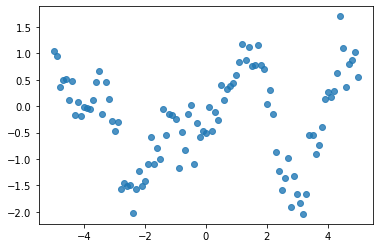

In [4]:
sns.regplot(x, y, fit_reg=False)

Let's specify our covariance function, or **kernel**:

In [5]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

All `scikit-learn` functions expect a tabular set of input variables, either as a 2-dimensional NumPy `array` or a pandas `DataFrame`. 

Since we have only a single input variable here, we add a second dimension using the `reshape` method:

In [6]:
X = x.reshape(-1, 1)
X.shape

(101, 1)

 We instantiate a `GaussianProcessRegressor` object with our custom kernel, and call its `fit` method, passing the input (`X`) and output (`y`) arrays, very much like we do with skikit-learn's regression forest:

In [7]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

`scikit-learn` displays the configuration that is used for the fitting algorithm each time one of its classes is instantiated. 

- This is useful because it reveals hidden settings that are given default values if not specified by the user; these settings can often influence the resulting fit, so its important that we understand what `fit` has assumed on our behalf. 

Here, for example, we see that the L-BFGS-B algorithm has been used to optimized the hyperparameters (`optimizer='fmin_l_bfgs_b'`) and that the output variable has not been normalized (`normalize_y=False`). 

- When there is a fear of finding a local, rather than a global maximum in the marginal likelihood, a non-zero value can be specified for `n_restarts_optimizer`, which will run the optimization algorithm as many times as specified, using randomly-chosen starting coordinates, in the hope that a globally-competitive value can be discovered.

The `fit` method endows the returned model object with attributes associated with the fitting procedure; these attributes will all have an underscore (`_`) appended to their names. For example, the `kernel_` attribute will return the kernel used to parameterize the GP, along with their corresponding optimal hyperparameter values:

In [8]:
gp.kernel_

0.00316**2 + Matern(length_scale=1.11, nu=1.5) + WhiteKernel(noise_level=0.0912)

Along with the `fit` method, each supervised learning class retains a `predict` method that generates predicted outcomes ($y^*$) given a new set of predictors ($X^*$) distinct from those used to fit the model (the so-called test cases, or just a new $x$ that we want to predict the interpolated $y$ value for). 

For a Gaussian process, this is fulfulled by the **posterior predictive distribution**, which is the Gaussian process with the mean and covariance functions updated to their posterior forms, after having been fit. 

$$p(y^*|y, x, x^*) = \mathcal{GP}(m^*(x^*), k^*(x^*))$$

The posterior mean and covariance functions are calculated as:

$$\begin{aligned}
m^*(x^*) &= k(x^*,x)^T[k(x,x) + \sigma^2I]^{-1}y \\
k^*(x^*) &= k(x^*,x^*)+\sigma^2 - k(x^*,x)^T[k(x,x) + \sigma^2I]^{-1}k(x^*,x)
\end{aligned}$$

Let's do this for a range of $x$'s:

In [9]:
x_pred = np.linspace(-6, 6).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

`predict` optionally returns posterior standard deviations along with the expected value, so we can use this to plot a confidence region around the expected function:

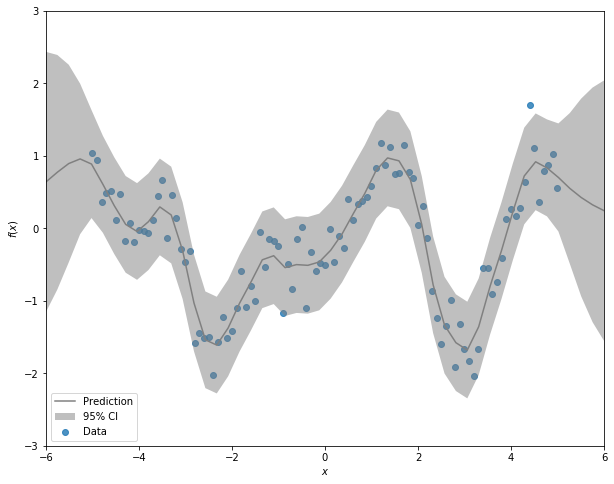

In [10]:
plt.figure(figsize=(10,8))
sns.regplot(x, y, fit_reg=False, label='Data')
plt.plot(x_pred, y_pred, color='grey', label='Prediction')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(-6, 6)
plt.ylim(-3, 3)
plt.legend(loc='lower left');

And just like that... you now know the exact profile of gold in your gold mine under the mountain, given various sample observations of gold deposits in the mountain.

## 12. GPs with PyMC3

The PyMC project is a very general Python package for probabilistic programming that can be used to fit nearly any Bayesian model. PyMC3 was built on top of [Theano](http://deeplearning.net/software/theano/), an engine for evaluating expressions defined in terms of operations on tensors. Newer version are now built on top of TensorFlow. 

Both Theano and Tensorflow providing automatic differentiation, parallel computation, and dynamic generation of efficient, compiled code.

In [11]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as gp_fit:

    ρ = pm.Gamma('ρ', 1, 1)
    η = pm.Gamma('η', 1, 1)
    
    K = η * pm.gp.cov.Matern32(1, ρ)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\Users\admin\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We speficy a **mean function** (redundant, since a zero function is assumed when not specified) and an observation noise variable, which we will model as a [half-Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) prior:

In [12]:
with gp_fit:
    
    M = pm.gp.mean.Zero()
    σ = pm.HalfCauchy('σ', 2.5)

`PyMC3`'s Gaussian Process Models are encapsulated within the `gp` class, parameterized by the mean function, covariance function, and observation error. The most common implementation of a GP is the `gp.Marginal` class.

In [13]:
with gp_fit:

    gp = pm.gp.Marginal(mean_func=M, cov_func=K)

The marginal likelihood:

In [14]:
with gp_fit:
    
    y_obs = gp.marginal_likelihood('y_obs', X=X, y=y, noise=σ)

D:\Users\admin\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


The sample function called inside the Model context fits the model using MCMC sampling. By default, PyMC3 uses an auto-tuning version of Hamiltonian Monte-Carlo (HMC) called the No U-turn Sampler (NUTS) that picks appropriate values for the path length and step size parameters. 

Additionally, to initialize the sampler to reasonable starting parameter values, a variational inference algorithm is run before NUTS, to yield approximate posterior mean values for all the parameters.

But that's details you don't need to know :-)

In [15]:
with gp_fit:
    
    trace = pm.sample(100, n_init=10)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, η, ρ]
Sampling 4 chains: 100%|██████████| 2400/2400 [2:57:55<00:00,  8.82s/draws]  


In [ ]:
pm.traceplot(trace[-1000:], varnames=['ρ', 'σ', 'η']);

In [ ]:
pm.plot_posterior(trace[-1000:], varnames=['ρ', 'σ', 'η'])

The mean values are the best **point estimate approximations** for the hyperparameters ρ, σ, and η:

In [63]:
ρm = trace[-1000:]['ρ'].mean()
ρm 

NameError: name 'trace' is not defined

In [64]:
σm = trace[-1000:]['σ'].mean()
σm 

NameError: name 'trace' is not defined

In [ ]:
ηm = trace[-1000:]['η'].mean()
ηm 

Let's collect the results into a pandas dataframe to display:

In [ ]:
mm = [ρm, σm, ηm]

In [ ]:
pd.DataFrame({"Parameter": ['ρ', 'σ', 'η'],
              "best approximation": [ρm, σm, ηm]})

These should fit the Maximum A Posteriori (MAP) estimate, which we can also tabulate from PyMC3:

In [ ]:
with gp_fit:
    mp = pm.find_MAP()

In [ ]:
mp

In [ ]:
# "mp" stands for marginal posterior
pd.DataFrame({"Parameter": ['ρ', 'σ', 'η'],
              "Value at MAP": [float(mp["ρ"]), float(mp["σ"]), float(mp["η"])]})

#### Hmm... my MAP values do not coincide with my trace means.. What did professor do wrong?

In addition to fitting the model, we would like to be able to generate ***predictions***!

This implies sampling from the **posterior predictive distribution**, which if is just some simple ;-) linear algebra:

$$\begin{aligned}
m^*(x^*) &= k(x^*,x)^T[k(x,x) + \sigma^2I]^{-1}y \\
k^*(x^*) &= k(x^*,x^*)+\sigma^2 - k(x^*,x)^T[k(x,x) + \sigma^2I]^{-1}k(x^*,x)
\end{aligned}$$

PyMC3 allows for predictive sampling after the model is fit, using the recorded values of the model parameters to generate samples. The `gp.conditional` function implements the predictive GP above, called with a grid of points over which to generate realizations:

Let's generate predictions for the profile of our gold deposits, based on drillined site samples (our observations):

In [ ]:
Z = np.linspace(-6, 6, 100).reshape(-1, 1)

with gp_fit:

    y_pred = gp.conditional("y_pred", Xnew=Z, pred_noise=True)

In [ ]:
# To use the point estimate hyperparameter values, replace the trace with a length-1 list with `mm`
with gp_fit:
    y_samples = pm.sample_ppc([mp], vars=[y_pred], samples=500)

In [ ]:
y_samples["y_pred"]

Plot predictions:

In [ ]:
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, y_samples["y_pred"], Z, plot_samples=False, palette="bone_r");

# overlay a scatter of one draw of random points from the posterior predictive distribution
plt.plot(Z, y_samples["y_pred"][200, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
#plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-3,3]);
plt.title("posterior predictive distribution"); plt.legend();

Not too shabby, ay?

</br >
<center>
<img src="ipynb.images/scoobydoo.png" width=400 />
</center>

For models being fit to very large datasets, one often finds MCMC fitting to work too slowly, as the log-probability of the model needs to be evaluated at every iteration of the sampling algorithm. 

In these situations, it may be worth using variational inference methods (which replace the true posterior with a simpler approximation), or even just Metropolis. 

Don't forget.. the PyMC3 GP algorithms were implemented by students. *Good* students, but still.. students. You will find by googling a bit that researchers prefer other GP libraries that are faster, such as `celerite`. 

## 13. GP Lab

Let's define points at which our family of priors will be sampled: 75 evenly spaced points between -5 and 5. 

How are we going to build the functions $f_1, \cdots, f_n$ that we're going to use as our *priors*? We're going to create a list of $x_1, \cdots, x_n$, and we're going to use the gaussian as our similarity (or kernel) function:

$$k(x_p, x_q) = \mathrm{exp}\left[ -\frac{(x_p - x_q)^2}{2 \ell^2} \right]$$

The kernel function expresses the similarity of each observed to each other observed, or in other words their degree of correlation. The gaussian calculates the squared distance between points and converts it into a measure of similarity, controlled by a tuning parameter $\ell$. We assume a mean of 0 for our prior.


Then we compute the Cholesky decomposition of the covariance matrix. 

By multiplying the Cholesky with 3 different gaussian random variates, we get 3 prior functions, which we plot, so we can admire our handywork!

```(python)
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
```

So, let's create an array on the x-axis (observations):

```(python)
# Test data
n = 100
Xtest = np.linspace(-5, 5, n).reshape(-1,1)
#print(Xtest)
```

Let's define the kernel function (a gaussian, with a parameter which represents a length squared):

```(python)
# Define the gaussian kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)
```

Let's build the covariance matrix of our observations:
```(python)
param = 0.1
K_ss = kernel(Xtest, Xtest, param) #this is K_**
```

Let's compute the [Cholesky decomposition]() (square root) of the covariance matrix. 

It's just a bit more complicated version of the same linear algebra decompostion that we did with our eigevector matrix to prove that the power of a Markovian stochastic transition matrix is easy to compute if you know the eigenvalues and eigenvectors. 

```(python)
L = np.linalg.cholesky(K_ss + 1e-10*np.eye(n))
```

Now, sample 2 sets of standard normal distributions for our test points, and multiply them by the square root of the covariance matrix:
```(python)
f_prior = np.dot(L, np.random.normal(size=(n,2)))
```

Now plot the 2 sampled functions:
```(python)
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Two samples from the GP prior')
```

<div style="display:none;">
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

# Test data
n = 100
Xtest = np.linspace(-5, 5, n).reshape(-1,1)
#print(Xtest)

# Define the gaussian kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param) #this is K_**

# Get cholesky decomposition (square root) of the covariance matrix
L = np.linalg.cholesky(K_ss + 1e-10*np.eye(n))

# Sample 3 sets of standard normal distributions for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,2)))

# Now plot the 2 sampled functions
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')
</div>

***All right, all right, all right***!

So the functions above are not modelling our data. Thet are just **basis functions** that will allow us to model our data, *much in the same way that eigenvectors are basis vectors that allow us to express the transformation of a vector by a transition matrix A as a linear combination of the eigenvectors of A with the eigenvalues as multiplicative factors*. 

They are our priors the same way you pick some parameter values as your priors when you assume a Bayesian probabilistic model, and you want to find the posterior of these parameters given your dataset and your likelihood function.

We're going use the functions above as our **priors**. We will compute the covariance matrix of our training data, and its Cholesky decomposition. We add a small perturbation on the diagonals (`np.eye` is the matrix with 1 in its diagonals, 0 otherwise), to ***add numerical stability to our Cholesky decomposition*** (Cholesky is very unstable).

Ready?

Now let's ***simulate some data***. This will be our ***training data**: We will pick 5 $(x,y)$ points from the simulated dataset. Let's use the `sin` function to generate the dataset (the $y$ values from our $x$ values).
```(python)
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1, 1.5, 3.5]).reshape(7,1)
ytrain = np.sin(Xtrain)
```

Let's apply the kernel function to our training points:
```(python)
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))
```

Compute the mean at our test points:
```(python)
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))
```

Compute the standard deviation so we can plot it:
```(python)
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
```

Now, draw samples from the posterior at our test points:
```(python)
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))
```

and plot!
```(python)
pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()
```

<div style="display:none;">
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1, 1.5, 3.5]).reshape(7,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()
</div>

***All right, all right, allright***!

Observe how the training points (blue squares in the output above) have "corraled" the set of possible functions: The ones we sampled from the posterior to go through the training points. The dotted red line shows the mean output and the grey area shows 2 standard deviations from the mean. 

Note that the standard deviation is 0 at our training points because we did not add any noise to our data. Also note how things start to go a bit wild again to the right of our last training point $x = 1$. That won’t get reined in until we observe some data over there, or by adding additional constraints on the herky-jerky nature of our posterior functions.


Ok, so the computation above only used `numpy`. Now we're going to leverage `PyMC3` to do GP estimation.

PyMC3's `gp.Marginal` class implements a common case of GP regression, where the observed data are the sum of a GP and Gaussian noise. In other words, the observations $y$ are the unknown function to model, plus noise:

$$\begin{split}\begin{aligned}
  \epsilon &\sim N(0, \Sigma) \\
  y &= f(x) + \epsilon \\
\end{aligned}\end{split}$$

We are going to use the [Matern](https://en.wikipedia.org/wiki/Mat%C3%A9rn_covariance_function) 5/2, a smooth kernel function. 

We draw random samples from a [multivariate normal distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.multivariate_normal.html) (generalization of the one-dimensional normal distribution to higher dimensions), which we're not supposed to know (we're going to use that to match with the final result to see how well our model performs). Then we add some noise with `σ_true * np.random.randn(n)` and *that* becomes our observations (what we know). We flatten to one dimension using numpy's `.flatten()` (read [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.flatten.html0)). And we plot the original data (generator) and the noisy data (observations). Change the random seed and see the data change!

Again, it is a well-known fact that when two training inputs are too close in input space, the covariance matrix may become not-positive definite. As a result, the [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) of the covariance matrix, necessary for GP computations, may fail due to numerical error. The standard solution to alleviate ill-conditioning is to add a **ridge** or **nugget** to the diagonal of the covariance matrix, which amounts to adding (or increasing, if already present) **observation noise**. We do this below with `+ 1e-8*np.eye(n)`. We're inoculating ourselves to ill-conditioning. But just to be safe, we don't take *too many* data points, just 100 between 0 and 10. If you blow up with a different seed or by changing any other parameters, I'd like to take a look..

Another option consists in just altering the troublesome points. Essentially, the observation is that close-by points are highly redundant, in fact so redundant that they reduce the rank of the covariance matrix. Since one those points is contributing little information to the problem at hand, removing one or the other (or averaging them, or "bouncing" one point away from the other to some minimal acceptable distance) will not really change your solution all that much.

BTW, if anyone thinks this math is too tough, note that PyMC3's `gp.Marginal` was written by students (like you) at Google's summer code camp 2017 (go [here](https://github.com/pymc-devs/pymc3/releases) and browse over to the manifest for v3.2 Final: *This version includes two major contributions from our Google Summer of...*). Wanna work for Google?

</br >
<center>
<img src="ipynb.images/googleTshirt.png" width=200 />
</center>

Let's use the [Matern covariance function](https://en.wikipedia.org/wiki/Mat%C3%A9rn_covariance_function):

```(python)
import pymc3 as pm
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# set the seed
np.random.seed(25)

n = 100 # The number of data points
X = np.linspace(0, 10, n)[:, None] # The inputs to the GP, note: They must be arranged as a column vector for PyMC3

# Define the true covariance function and its hyper-parameters
ℓ_true = 1.0
η_true = 3.0
cov_func = η_true**2 * pm.gp.cov.Matern52(1, ℓ_true)
```

A mean function that is zero everywhere:
```(python)
mean_func = pm.gp.mean.Zero()
```

The latent function (equivalent to the likelihood in Bayesian classical estimation) values are a sample from a multivariate normal distribution.

Note that we have to call `eval()` because PyMC3 is built on top of Theano (for the version living on professor's laptop). I don't know what will actually happen if you don't have theano installed. Maybe install it (sorry, professor very lazy, when his code works, he bikes home happy, does not mess with perfection)?
```(python)
f_true = np.random.multivariate_normal(mean_func(X).eval(),
                                       cov_func(X).eval() + 1e-8*np.eye(n), 1).flatten()
```

The observed data is the latent function plus a small amount of Gaussian noise.

The standard deviation of the noise is `sigma`:
```(python)
σ_true = 2.0
y = f_true + σ_true * np.random.randn(n)
```

Plot the data and the (unobserved) latent function. Hopefully, our Gaussian Process yields an approximation of the data that is as close as possible to the latent function.
```(python)
fig = plt.figure(figsize=(12,5)); ax = fig.gca()
ax.plot(X, f_true, "dodgerblue", lw=3, label="True f");
ax.plot(X, y, 'ok', ms=3, alpha=0.5, label="Data");
ax.set_xlabel("X"); ax.set_ylabel("The true f(x)"); plt.legend();
```

<div style="display:none;">
import pymc3 as pm
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# set the seed
np.random.seed(25)

n = 100 # The number of data points
X = np.linspace(0, 10, n)[:, None] # The inputs to the GP, note: They must be arranged as a column vector for PyMC3

# Define the true covariance function and its hyper-parameters
ℓ_true = 1.0
η_true = 3.0
cov_func = η_true**2 * pm.gp.cov.Matern52(1, ℓ_true)

# A mean function that is zero everywhere
mean_func = pm.gp.mean.Zero()

# The latent function values are one sample from a multivariate normal distribution
# Note that we have to call `eval()` because PyMC3 is built on top of Theano
f_true = np.random.multivariate_normal(mean_func(X).eval(),
                                       cov_func(X).eval() + 1e-8*np.eye(n), 1).flatten()

# The observed data is the latent function plus a small amount of Gaussian noise
# The standard deviation of the noise is `sigma`
σ_true = 2.0
y = f_true + σ_true * np.random.randn(n)

## Plot the data and the unobserved latent function
fig = plt.figure(figsize=(12,5)); ax = fig.gca()
ax.plot(X, f_true, "dodgerblue", lw=3, label="True f");
ax.plot(X, y, 'ok', ms=3, alpha=0.5, label="Data");
ax.set_xlabel("X"); ax.set_ylabel("The true f(x)"); plt.legend();
</div>

***All right, all right, all right***!

Now that we have our observations $y$, we model the hyperparameters as a gamma and two Half-Cauchys. The [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) distribution is used quite  bit in stastics, and in particular the half-Cauchy has had a lot of [success](http://andrewgelman.com/2011/07/13/on_the_half-cau/) in modeling Bayesian model hyperparameters. Don't worry about this. This is just trial and error of many different ways to model hyperparameters, and this one is particularly successful.

We run an MCMC algorithm to find the [Maximum A Posteriori](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) estimate of the hyperparameters and tabulate them:
```(python)
with pm.Model() as model:
    #ℓ = pm.Gamma("ℓ", alpha=2, beta=1)
    ℓ = pm.HalfCauchy("ℓ", beta=1)
    η = pm.HalfCauchy("η", beta=5)

    cov = η**2 * pm.gp.cov.Matern52(1, ℓ)
    gp = pm.gp.Marginal(cov_func=cov)

    σ = pm.HalfCauchy("σ", beta=5)
    y_ = gp.marginal_likelihood("y", X=X, y=y, noise=σ)

    mp = pm.find_MAP()
```

<div style="display:none;">
with pm.Model() as model:
    #ℓ = pm.Gamma("ℓ", alpha=2, beta=1)
    ℓ = pm.HalfCauchy("ℓ", beta=1)
    η = pm.HalfCauchy("η", beta=5)

    cov = η**2 * pm.gp.cov.Matern52(1, ℓ)
    gp = pm.gp.Marginal(cov_func=cov)

    σ = pm.HalfCauchy("σ", beta=5)
    y_ = gp.marginal_likelihood("y", X=X, y=y, noise=σ)

    mp = pm.find_MAP()
</div>

***All right, all right, all right***!

Now collect the results into a pandas dataframe to display. "mp" stands for **m**arginal **p**osterior
```(pandas)
pd.DataFrame({"Parameter": ["ℓ", "η", "σ"],
              "Value at MAP": [float(mp["ℓ"]), float(mp["η"]), float(mp["σ"])],
              "True value": [ℓ_true, η_true, σ_true]})
```

<div style="display:none;">
# collect the results into a pandas dataframe to display
# "mp" stands for marginal posterior
pd.DataFrame({"Parameter": ["ℓ", "η", "σ"],
              "Value at MAP": [float(mp["ℓ"]), float(mp["η"]), float(mp["σ"])],
              "True value": [ℓ_true, η_true, σ_true]})
</div>

***All right, all right, all right***!

We used the GP + noise to find the optimal hyperparameters.

PyMC3's `.conditional` has an optional flag for `pred_noise`, which defaults to False. When `pred_noise=False`, the conditional method produces the predictive distribution for the underlying function represented by the GP. When `pred_noise=True`, the conditional method produces the predictive distribution for the GP ***plus noise***.

Let's plot just the estimated GP ***without the noise*** on an increased x-axis.
```(python)
# new values from x=0 to x=20
X_new = np.linspace(0, 20, 600)[:,None]

# add the GP conditional to the model, given the new X values
with model:
    f_pred = gp.conditional("f_pred", X_new)

# To use the MAP values, you can just replace the trace with a length-1 list with `mp`
with model:
    pred_samples = pm.sample_ppc([mp], vars=[f_pred], samples=2000)
```

<div style="display:none;">
# new values from x=0 to x=20
X_new = np.linspace(0, 20, 600)[:,None]

# add the GP conditional to the model, given the new X values
with model:
    f_pred = gp.conditional("f_pred", X_new)

# To use the MAP values, you can just replace the trace with a length-1 list with `mp`
with model:
    pred_samples = pm.sample_ppc([mp], vars=[f_pred], samples=2000)
</div>

***All right, all right, all right***!

Let's plot! 

Note that the shading underscores that we're plotting a probability distribution, so it's maximal at the core and then dies out towards its standard deviations.
```(python)
# plot the results
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_pred"], X_new);

# plot the data and the true latent function
plt.plot(X, f_true, "dodgerblue", lw=3, label="True f");
plt.plot(X, y, 'ok', ms=3, alpha=0.5, label="Observed data");

# axis labels and title
plt.xlabel("X"); plt.ylim([-13,13]);
plt.title("Posterior distribution over $f(x)$ at the observed values"); plt.legend();
```

<div style="display:none;">
# plot the results
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_pred"], X_new);

# plot the data and the true latent function
plt.plot(X, f_true, "dodgerblue", lw=3, label="True f");
plt.plot(X, y, 'ok', ms=3, alpha=0.5, label="Observed data");

# axis labels and title
plt.xlabel("X"); plt.ylim([-13,13]);
plt.title("Posterior distribution over $f(x)$ at the observed values"); plt.legend();
</div>

***All right, all right, all right***!

So the reason the posterior is so close to the True generating function is because we only predicted $f_∗$, not $f_∗$ + noise, which is what we actually observe. So let's set `pred_noise=True`:
```(python)
with model:
    y_pred = gp.conditional("y_pred", X_new, pred_noise=True)
    y_samples = pm.sample_ppc([mp], vars=[y_pred], samples=2000)
```

<div style="display:none;">
with model:
    y_pred = gp.conditional("y_pred", X_new, pred_noise=True)
    y_samples = pm.sample_ppc([mp], vars=[y_pred], samples=2000)
</div>

***All right, all right, all right***!

Let's plot:
```(python)
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
plot_gp_dist(ax, y_samples["y_pred"], X_new, plot_samples=False, palette="bone_r");

# overlay a scatter of one draw of random points from the
#   posterior predictive distribution
plt.plot(X_new, y_samples["y_pred"][800, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("posterior predictive distribution, y_*"); plt.legend();
```

<div style="display:none;">
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
plot_gp_dist(ax, y_samples["y_pred"], X_new, plot_samples=False, palette="bone_r");

# overlay a scatter of one draw of random points from the
#   posterior predictive distribution
plt.plot(X_new, y_samples["y_pred"][800, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("posterior predictive distribution, y_*"); plt.legend();
</div>

***All right, all right, all right***!

The posterior predictive density is ***wider*** than the conditional distribution of the noiseless function, and reflects the predictive distribution of the noisy data, which is marked as black dots. 

But see how our simulated data points match the observed data points pretty well? This is what Data Science is about: We have some observations, and we use these observations to build a **model**. Then we throw away the data, and we can use our model to predict the process uderlying our original observations with very close statistical matching. 

We can also use PyMC3's `.predict` method to return the mean and variance given a particular point. `.predict` returns the same mean and covariance that the distribution of `.conditional` has:
```(python)
# predict
mu, var = gp.predict(X_new, point=mp, diag=True)
sd = np.sqrt(var)
```

<div style="display:none;">
# predict
mu, var = gp.predict(X_new, point=mp, diag=True)
sd = np.sqrt(var)
</div>

***All right, all right, all right***!

Let's plot:
```(python)
# draw plot
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot mean and 2σ intervals
plt.plot(X_new, mu, 'r', lw=2, label="mean and 2σ region");
plt.plot(X_new, mu + 2*sd, 'r', lw=1); plt.plot(X_new, mu - 2*sd, 'r', lw=1);
plt.fill_between(X_new.flatten(), mu - 2*sd, mu + 2*sd, color="r", alpha=0.5)

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("predictive mean and 2σ interval"); plt.legend();
```

<div style="display:none;">
# draw plot
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot mean and 2σ intervals
plt.plot(X_new, mu, 'r', lw=2, label="mean and 2σ region");
plt.plot(X_new, mu + 2*sd, 'r', lw=1); plt.plot(X_new, mu - 2*sd, 'r', lw=1);
plt.fill_between(X_new.flatten(), mu - 2*sd, mu + 2*sd, color="r", alpha=0.5)

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("predictive mean and 2σ interval"); plt.legend();
</div>

***All right, all right, all right***! 

You are ***done*** with the lab. Congratulations!

Enough with the ***all rights***!
</br >
<center>
<img src="ipynb.images/angry-scoobydoo.png" width=400 />
</center>

## 14. Gaussian Mixture Models

[Gaussian Mixture Models](https://scikit-learn.org/stable/modules/mixture.html) (GMM) are a neat methodolgy for modelling observations that stem from *multiple groupings*. 

A [mixture model](https://en.wikipedia.org/wiki/Mixture_model) is a probabilistic model for representing the presence of subpopulations within an overall population, without requiring that an observed data set should identify the sub-population to which an individual observation belongs. 

Mixture models are used to make statistical inferences about the properties of sub-populations given only observations on the pooled population, without sub-population identity information.

Let's draw normal distributions from 3 different populations and mix them in.

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import seaborn as sns

SEED = 25
np.random.seed(SEED) 

N = 1000
W = np.array([0.35, 0.4, 0.25])
MU = np.array([0., 2., 5.])
SIGMA = np.array([0.5, 0.5, 1.])

component = np.random.choice(MU.size, size=N, p=W)  #1st arg: arange(MU.size), p: probabilities associated with each 1sy arg entry 
x = np.random.normal(MU[component], SIGMA[component], size=N) #random samples from a normal distribution @ 1st arg

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(x, bins=50, normed=True, lw=0);

Specify and fit a marginalized Gaussian mixture model (GMM) to this data in `PyMC3`. Here, we introduce a new pdf called **Dirichlet**. The [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) is the multivariate generalization of the beta distribution (our "baseball" distribution, used to model the behavior of random variables limited to intervals of finite length). It is used a lot in [Natural Language Processing](https://en.wikipedia.org/wiki/Natural_language_processing) (NLP).

The Dirichlet pdf does not sample from the space of real numbers, like the normal pdf does. Instead it samples over a probability simplex (probabilities over $n$ distinct categories, representing the dimensions of our multivariate distribution). A 4-dimentional Dirichlet distribution has 4 parameters. So, it's tailor-made for mixture models.

In [ ]:
with pm.Model() as model_mm:
    w = pm.Dirichlet('w', np.ones_like(W))  #array of ones with the same shape and type as W

    mu = pm.Normal('mu', 0., 10., shape=W.size)
    tau = pm.Gamma('tau', 1., 1., shape=W.size)

    x_obs = pm.NormalMixture('x_obs', w, mu, tau=tau, observed=x)

In [ ]:
with model_mm:
    trace_mm = pm.sample(5000, n_init=10000, tune=1000, random_seed=SEED)[1000:]

The posterior distribution on the weights and the component means has captured the true value quite well:

In [ ]:
pm.traceplot(trace_mm, varnames=['w', 'mu', 'tau']);

In [ ]:
pm.plot_posterior(trace_mm, varnames=['w', 'mu']);

Let's sample from the model’s posterior predictive distribution:

In [ ]:
with model_mm:
    ppc_trace = pm.sample_ppc(trace_mm, 5000, random_seed=SEED)

and let's plot:

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(x, bins=50, normed=True,
        histtype='step', lw=2,
        label='Observed data');

ax.hist(ppc_trace['x_obs'], bins=50, normed=True,
        histtype='step', lw=2,
        label='Posterior predictive distribution');

ax.legend(loc=1);

Not too shabby...

If a sports team is comprised of 11 players, each with his own abilities in passes or distance covered (with a superstar on some teams with way above average abilities, e.g. a Christiano Ronaldo, or a Lionel Messi), then team abilities could be modeled as a GMM. That way, you could go from individual player rankings to complete team rankings.

## 15. Conclusion

A **covariance function** is the crucial ingredient in a **Gaussian Process** (GP) predictor. It ***encodes our assumptions about the function which we wish to learn*** and which ***passes through all our observations*** and ***has the highest probability to represent the rule behind the process*** that generates our observations. That is why we started the notebook with simple **point-estimates of covariance** for univariate distributions, then the **covariance matrix** for multivariate distribtions, and finally a **covariance function** (such as the Matern) for GPs.

In **supervised learning**, the notion of similarity between data points is ***crucial***. It is a basic similarity assumption that points with inputs $x$ which are close are likely to have similar target values $y$, and thus training points (prior distributions) that are near to a test point (posterior distributions) should be informative about the prediction at that point. Under the Gaussian process view, it is the covariance function that deﬁnes nearness or similarity.

</br >
<center>
<img src="images/GPs2.png" width=900 />
    *Observations define the data points that inform likelhood, mean, and covariance functions*
</center>
<br />

How do GPs differ from classical Bayesian estimation? Rather than work in **parameter space**, which is where all the priors live, we can bypass it by just working in **data space**. This allows us to worry only about how different data points relate to one another without needing to specify the parameters of the data generating process. We say that this method is non-parametric, in the same way that regression trees are non-parametric (even though the covariance function is ***very*** parametric).

The **posterior predictive distribution** encapsulates our uncertainty about the data generating process. The choice of covariance kernel —which says how different observations inform one another—, implies certain properties of the data generating process (this is essentially a hyperparameter of our model).

Here's some math we skipped, but which is important should you decide to concentrate more on GPs:

- [Mercer’s theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem) allows you to express the covariance function (under certain conditions) in terms of its **eigenfunctions and eigenvalues**.

- A general name for a function $k$ of two arguments mapping a pair of inputs$x ∈ X$, $x_0 ∈ X$ into the set of real numbers is called a **kernel**. This term arises in the theory of integral [operators](https://en.wikipedia.org/wiki/Operator_theory).

- Given a set of input points ${x_i\;|\;i = 1,\cdots,n}$ we can compute the [Gram matrix](https://en.wikipedia.org/wiki/Gramian_matrix) $K$ whose entries are $K_{ij} = k(x_i,x_j)$. If $k$ is a covariance function, we call the matrix $K$ the **covariance matrix**.

- A real $n × n$ matrix $K$ which satisﬁes $Q(v) = v^TKv ≥ 0$ for all vectors $v$ $∈ R^n$ is called **positive semideﬁnite** (PSD). If $Q(v) = 0$ only when $v = 0$, the matrix is **positive deﬁnite**. $Q(v)$ is called a **quadratic form**. A symmetric matrix is PSD if and only if all of its eigenvalues are non-negative. A Gram matrix corresponding to a general kernel function need not be PSD, but the Gram matrix corresponding to a covariance function is PSD.

The theoretical basis for GPs was developed by the French mathematician [Georges Matheron](https://en.wikipedia.org/wiki/Georges_Matheron) in 1960, based on the Master's thesis of [Danie G. Krige](https://en.wikipedia.org/wiki/Danie_G._Krige), the pioneering plotter of distance-weighted average gold grades at the [Witwatersrand reef complex](https://en.wikipedia.org/wiki/Witwatersrand) in South Africa. Krige sought to estimate the most likely distribution of gold based on samples from a few boreholes. Thus, [kriging](https://en.wikipedia.org/wiki/Kriging). 

- [Norbert Wiener](https://en.wikipedia.org/wiki/Norbert_Wiener) (USA) and [Andrey Kolmogorov](https://en.wikipedia.org/wiki/Andrey_Kolmogorov) (Russia) pioneered some of the earlier, related, work on interpolation techniques.

### In a nutshell
A set of values (samples) is observed, each value associated with a spatial location. The covariance between *any two* samples is the covariance function (or kernel) of the Gaussian Process (GP) evaluated at the spatial location of the two points. 

Now, a new value (test point) can be predicted at any new spatial location, by combining the Gaussian prior with a Gaussian likelihood function for each of the observed values. The resulting posterior distribution is also Gaussian, with a mean and covariance that can be simply computed from the observed values, their variance, and the kernel matrix derived from the prior.

GPs are a very expressive theoretical framework. No analytic prior to remember other than picking the right kernel functions, appropriate to the observations' smoothness and other global characteristics (picking hyperparameters continues to be the most delicate, unavoidable, part. 

- Even in Machine Learning! I've been to a few [talks](http://proceedings.mlr.press/v54/jun17a/jun17a.pdf) that posit parameterless approaches, but so far too soon to tell). 

To learn [more](http://www.gaussianprocess.org/gpml/) about GPs, and [more](http://people.cs.ubc.ca/~murphyk/MLbook/) about probabilistic machine learning, visit the links and play around with the experiments in this notebook.

This is the most complicated notebook of INFO 6105 as I teach it :-)

It gives you a good idea of what data science is about.

# Homework

Find an interesting dataset where one (independent) column has a strong **distance correlation** (DC) with the (dependent) column you want to model. Add some noise. The, use `scikit-learn` to run a regression forest and predict a number of variables. Then, model the dependent variable with `scikit-learn`'s GP. Which method does better?

## Bonus points

Repeat with two independent columns.

## Bonus points

Repeat with PyMC3 instead of scikit-learn.